### Student Information
Name: 張晴淳

Student ID: 313700038

GitHub ID: JEMMA-CHANG

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [278]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

labels = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=labels, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [279]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/chinnngz/Documents/lab 1/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


# 0. Data

## new dataset - reddit stock sentiment
內容為reddit上的投資社群貼文跟留言情緒資訊．欄位包含：
- `type`:資料型態，是貼文還是留言．
- `datetime`:發文的時間．
- `post_id` / `subreddit`(在哪個社群) / `title` / `author` / `url`
- `upvotes` / `downvotes` / `upvote_ratio`:推噓及其比例
- `text`
- `subjectivity`（越接近1越主觀）、`polarity`（越接近 1 越正向）、`sentiment`：文字情緒分析結果。
- `entities`：抽取出的關鍵詞。
- `label`：整體情緒標籤。

# 1. data preparation

In [281]:
data_path = "newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(data_path)

print(f"資料筆數：{len(df)}")
df[0:5]

資料筆數：847


type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   
3  https://www.reddit.com/r/stockstobuytoday/comm...       30        0.0   
4  https://edition.cnn.com/2025/04/10/politics/tr...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1           NaN  Stunt as in like why did they even make a big ...   
2           NaN                  Seeing lots of red in the ticker.   
3          0.98  Vision Marine Technologies Inc. is rewriting t...   
4           NaN                           He didn’t say thank you.   

   subjectivity  polarity  sentiment  \
0      1.000000 -0.900000       -1.0   
1      0.177778  0.083333        1.0   
2      0.000000  0.000000        0.0   
3      0.646970  0.216383        1.0   
4      0.000000  0.000000        0.0   

                                            entities  label  
0                                                 []   -1.0  
1              ['Stunt', 'company', 'deal', 'place']    0.0  
2                                         ['ticker']    0.0  
3  ['watercraft', 'skill', 'power', ']', 'feat', ...    1.0  
4                                                 []   -1.0

In [282]:
cols = df.columns.tolist()
cols

['type',
 'datetime',
 'post_id',
 'subreddit',
 'title',
 'author',
 'url',
 'upvotes',
 'downvotes',
 'upvote_ratio',
 'text',
 'subjectivity',
 'polarity',
 'sentiment',
 'entities',
 'label']

In [283]:
pd.crosstab(df['sentiment'], df['label'])

label      -1.0   0.0   1.0
sentiment                  
-1.0        115    61    21
 0.0         93   212    26
 1.0        107   150    62

`'sentiment'`&`'label'`的情緒分類並非完全一致，為了方便後續作業，這裡選取`'label'`作為主要的依據．
對應到master notebook的欄位結構，

In [284]:
label_map = {
    -1.0: "negative",
     0.0: "neutral",
     1.0: "positive"
}

df['label_name'] = df['label'].map(label_map)   

df = df[['text', 'label', 'label_name']]
df[:5]


text  label label_name
0                                   Calls on retards   -1.0   negative
1  Stunt as in like why did they even make a big ...    0.0    neutral
2                  Seeing lots of red in the ticker.    0.0    neutral
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive
4                           He didn’t say thank you.   -1.0   negative

In [285]:
# print an example of text
print("\n".join(df['text'][0].split('\n')))

Calls on retards


## >>>Exercise 1:

In [286]:
for i in range(3):
    print(f'example {i+1}')
    print('\n'.join(df['text'][i].split('\n')))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


## 2. Data Transformation

## 2.1 converting data into Dataframe

因為這個資料集沒有`.data`的功能，所以就不用`helper`，直接用`pd.DataFrame`建立表格

In [287]:
X = pd.DataFrame({
    'text': df['text'].tolist(),
})

In [288]:
print(X[:2])

                                                text
0                                   Calls on retards
1  Stunt as in like why did they even make a big ...


In [289]:
len(X)

847

In [290]:
for t in X['text'][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### adding columns

In [291]:
X['label'] = df['label']

In [292]:
X['label_name'] = df['label_name']

In [293]:
# print and see what our table looks like
X[:10]

text  label label_name
0                                   Calls on retards   -1.0   negative
1  Stunt as in like why did they even make a big ...    0.0    neutral
2                  Seeing lots of red in the ticker.    0.0    neutral
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive
4                           He didn’t say thank you.   -1.0   negative
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    neutral
6  Trump will respond to china increasing their t...   -1.0   negative
7  Confirmed not a trap. Its been like this for p...    0.0    neutral
8  Am I the only one seeing the cup & handle brea...    1.0   positive
9  HLGN is $10. Hurry and catch it now before it ...    1.0   positive

## 2.2 familiarizing yourself with the data

In [294]:
# a simple query
X[:10][['text', 'label_name']]

text label_name
0                                   Calls on retards   negative
1  Stunt as in like why did they even make a big ...    neutral
2                  Seeing lots of red in the ticker.    neutral
3  Vision Marine Technologies Inc. is rewriting t...   positive
4                           He didn’t say thank you.   negative
5  Hoping to ejaculate in wet warm puss tonight, ...    neutral
6  Trump will respond to china increasing their t...   negative
7  Confirmed not a trap. Its been like this for p...    neutral
8  Am I the only one seeing the cup & handle brea...   positive
9  HLGN is $10. Hurry and catch it now before it ...   positive

In [295]:
# query the last 10 records
X[-10:]

text  label label_name
837                 Finance media lying \n\n*Surprise*   -1.0   negative
838                                        I am all in    0.0    neutral
839                               The Art of the Deal…    0.0    neutral
840                                             Lol fr    0.0    neutral
841  So countries “begging to stop the tariffs” and...    1.0   positive
842        Invest now it is going to shoot up tomorrow    1.0   positive
843                             Where can I read this?    0.0    neutral
844  Upgrades, Downgrades\n\n [Stock Analyst Recomm...    0.0    neutral
845  i sold my puts so i expect cheeto to declare w...   -1.0   negative
846                       ![img](emote|t5_2th52|31224)    0.0    neutral

In [296]:
# using loc(by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [297]:
#using iloc(by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

## >>>Exercise 2

In [298]:
#取出中性情緒的前三筆資料
X[X['label'] == 0][:3]

text  label label_name
1  Stunt as in like why did they even make a big ...    0.0    neutral
2                  Seeing lots of red in the ticker.    0.0    neutral
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    neutral

In [299]:
# 取出同時為中性情緒且'text'中包含'image'的前三筆資料
X[(X['label'] == 0) & (X['text'].str.contains('no'))][0:3]

text  label label_name
7   Confirmed not a trap. Its been like this for p...    0.0    neutral
28       My first wife was tarded, she's a pilot now.    0.0    neutral
31  $EVGO \n\n*Record Revenue increasing 5 straigh...    0.0    neutral

## >>>Exercise 3

Try to fetch records belonging to the `positive` label, and query every 10th record. Only shoe the first 5 records.

In [300]:
X[X['label_name'] == 'positive'][::10][:5]

text  label label_name
3    Vision Marine Technologies Inc. is rewriting t...    1.0   positive
78   I think it’s gonna work itself out. I bought t...    1.0   positive
168  The obvious can also be refreshing from CNBC: ...    1.0   positive
219  Same. Back to break even after that last rip b...    1.0   positive
319  Etrade has a feed of news articles about how r...    1.0   positive

# 3. Data Mining using Pandas

## 3.1 missing value

In [301]:
# check missing values
X.isnull()

text  label  label_name
0    False  False       False
1    False  False       False
2    False  False       False
3    False  False       False
4    False  False       False
..     ...    ...         ...
842  False  False       False
843  False  False       False
844  False  False       False
845  False  False       False
846  False  False       False

[847 rows x 3 columns]

In [302]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   0

## >>>Exercise 4

In [303]:
# calculate the missing values in every record.
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [304]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])
dummy_series

text     dummy_record
label               1
dtype: object

In [305]:
dummy_series.to_frame().T

text label
0  dummy_record     1

In [306]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

848

In [307]:
print(result_with_series[:3])

                                                text label label_name
0                                   Calls on retards  -1.0   negative
1  Stunt as in like why did they even make a big ...   0.0    neutral
2                  Seeing lots of red in the ticker.   0.0    neutral


In [308]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   1

In [309]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'label': 1
              }]

In [310]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [311]:
len(X)

848

In [312]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   1

In [313]:
X.dropna(inplace=True)

In [314]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   0

In [315]:
len(X)

847

## >>>Exercise 5

In [316]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [317]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## 3.2 Dealing with Duplicate Data

In [318]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [319]:
sum(X.duplicated())

23

In [320]:
sum(X.duplicated('text'))

23

我們可以發現資料中有23筆的`text`是有重複值的

In [321]:
# inplace applies changes directly on our dataframe
X.drop_duplicates(keep=False, inplace=True)

In [322]:
len(X)

813

# 4. Data Preprocessing

## 4.1 Sampling

In [323]:
X_sample = X.sample(n=500) 

In [324]:
len(X_sample)

500

In [325]:
X_sample[0:4]

text  label label_name
315  At this moment I would trust them more than th...   -1.0   negative
788  That was the most obvious bull trap in history...   -1.0   negative
276  His sneakers, guitars, and cyrpto (i am not na...    0.0    neutral
268                          He doesn't have the cards   -1.0   negative

In [326]:
X[0:4]

text  label label_name
0                                   Calls on retards   -1.0   negative
1  Stunt as in like why did they even make a big ...    0.0    neutral
2                  Seeing lots of red in the ticker.    0.0    neutral
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive

## >>>Exercise 6

In [327]:
# Answer here
print("原始X的大小：", X.shape)
print("抽樣後X_sample的大小：", X_sample.shape)
print("原始X的前十個索引：", X.index[:10].tolist())
print("抽樣後X原始X的前十個索引：", X_sample.index[:10].tolist())
print("X和X_sample的欄位是否相同？", X.columns.equals(X_sample.columns))
'''
1. 原始的資料大小跟抽樣後的資料大小不同，抽樣後資料會變少
2. 原始的索引是連續的，抽樣後會跳號'''

原始X的大小： (813, 3)
抽樣後X_sample的大小： (500, 3)
原始X的前十個索引： [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
抽樣後X原始X的前十個索引： [315, 788, 276, 268, 633, 86, 779, 710, 778, 68]
X和X_sample的欄位是否相同？ True


'\n1. 原始的資料大小跟抽樣後的資料大小不同，抽樣後資料會變少\n2. 原始的索引是連續的，抽樣後會跳號'

In [328]:
import matplotlib.pyplot as plt
%matplotlib inline

label_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


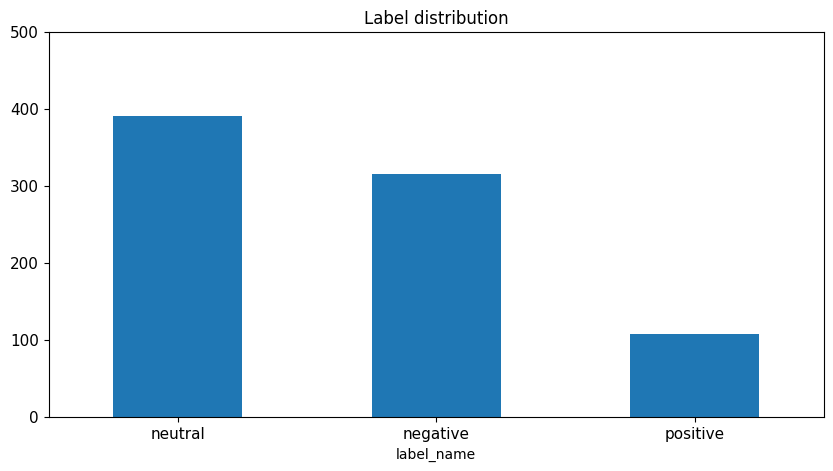

In [329]:
print(X['label_name'].value_counts())

# plot barchart for X
X['label_name'].value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (10,5));

label_name
neutral     236
negative    199
positive     65
Name: count, dtype: int64


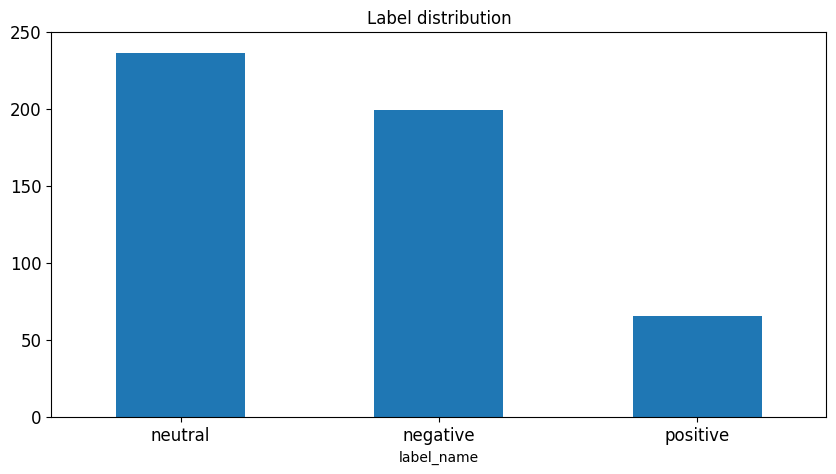

In [330]:
print(X_sample['label_name'].value_counts())

# plot barchart for X_sample
X_sample['label_name'].value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, 250], 
                                           rot = 0, fontsize = 12, figsize = (10,5));

## >>>Exercise 7

<Axes: title={'center': 'Label distribution'}, xlabel='label_name'>

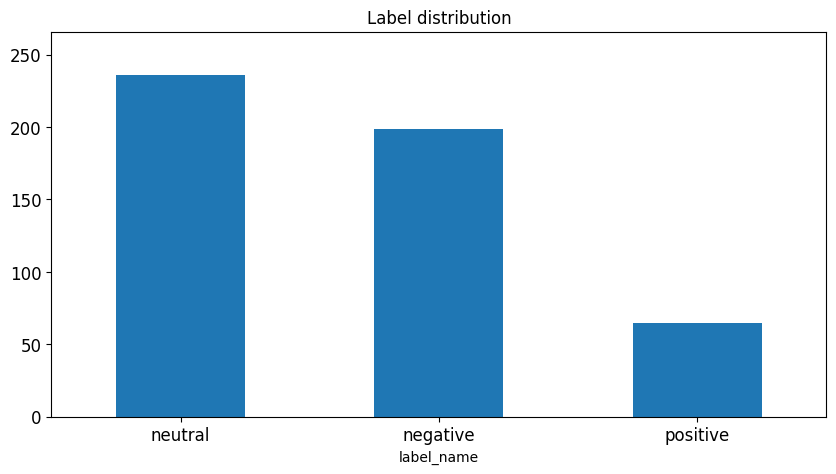

In [331]:
# automatically set the `ylim` parameters
X_sample['label_name'].value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, X_sample['label_name'].value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (10,5))

## >>>Exercise 8

do the side-by side comparison of the distribution between the two datasets

<Axes: title={'center': 'Label distribution'}, xlabel='label_name'>

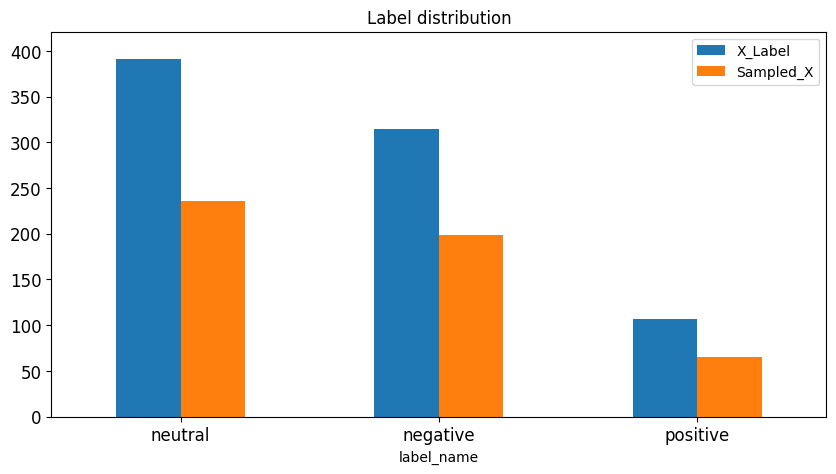

In [332]:
counts_X = X['label_name'].value_counts()
counts_sample = X_sample['label_name'].value_counts()
compare_df = pd.concat([counts_X, counts_sample], axis = 1, keys=["X_Label", "Sampled_X"])
compare_df.plot(kind = 'bar',
                title = 'Label distribution',
                ylim = [0, X['label_name'].value_counts().max()+30],
                rot = 0, fontsize = 12, figsize = (10,5))

## 4.2 Feature creation

In [333]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [334]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [335]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [336]:
X[0:4]

text  label label_name  \
0                                   Calls on retards   -1.0   negative   
1  Stunt as in like why did they even make a big ...    0.0    neutral   
2                  Seeing lots of red in the ticker.    0.0    neutral   
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...

In [337]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

## 4.3 Feature subset selection

In [338]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4313)>
  Coords	Values
  (0, 689)	1
  (0, 2682)	1
  (0, 3220)	1


In [339]:
count_vect.get_feature_names_out()[689]

'calls'

In [340]:
count_vect.get_feature_names_out()[2682]

'on'

In [341]:
count_vect.get_feature_names_out()[3220]

'retards'

依照剛剛設定的`CountVectorizer`產生一個斷詞產生器，呼叫後可以回傳該句的`token list`

In [342]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

## >>>Exercise 9

In [343]:
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['calls', 'on', 'retards']

In [344]:
X_counts.shape

(813, 4313)

In [345]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [346]:
X_counts[0:3, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [347]:
np.argwhere(X_counts[1, 0:200].toarray() > 0)



array([[  0, 175]])

In [348]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

## >>>Exercise 10

找出第二篇文章中前兩個在稀疏矩陣中非`0`的詞．
因為在稀疏矩陣內部的儲存順序不一定是按照索引的大小排序，
所以我們需要先對第二篇文章中所有非零值的索引進行排序，
再取出前兩個才會是第二篇文章中前兩個非零值的索引．


In [349]:
doc_vector = X_counts[1]
nonzero_idx = np.sort(doc_vector.nonzero()[1])
words = count_vect.get_feature_names_out()
for i, t in enumerate(nonzero_idx[0:2]):
    print(f'第{i+1}個非0的詞是： {words[t]}({t})')

第1個非0的詞是： about(175)
第2個非0的詞是： as(386)


In [350]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [351]:
# obtain document index
plot_y = ["doc_"+ str(i+1) for i in list(X.index)[0:20]]
plot_y

['doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19',
 'doc_20']

In [352]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

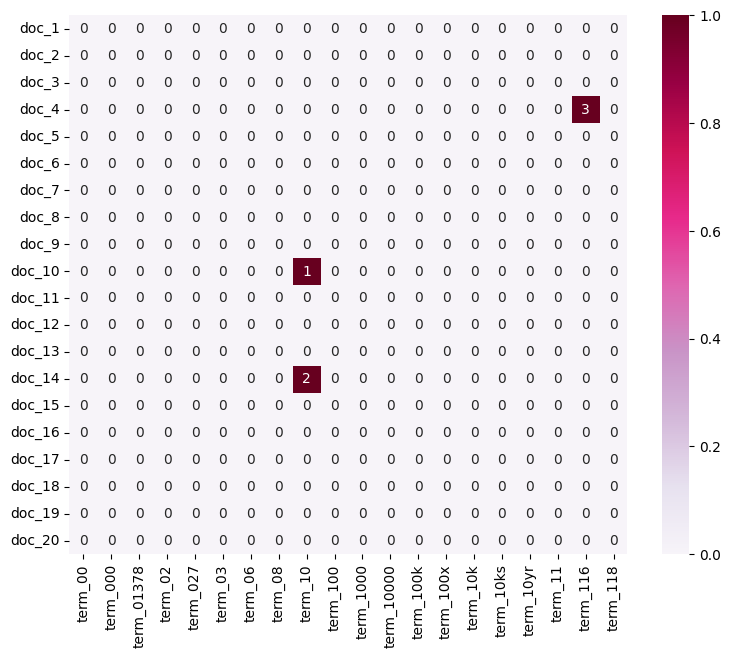

In [353]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## >>>Exercise 11

1. 只畫高頻詞的`heatmap`
2. 做`TF-IDF`把原本`1`的值壓縮

<Axes: >

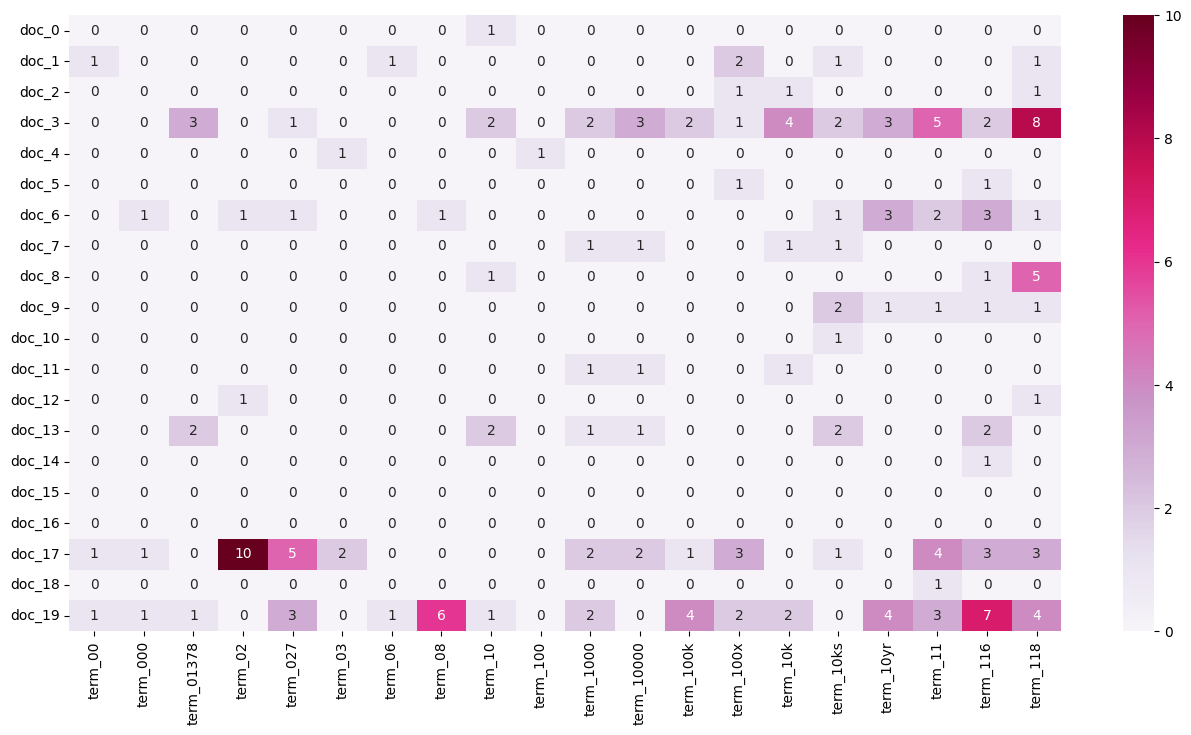

In [354]:
# 只畫高頻詞
term_freq = np.array(X_counts.sum(axis = 0)).flatten()
top_n = 20
top_idx = term_freq.argsort()[-top_n:]
subset = X_counts[0:20, top_idx].toarray()
df_top_terms = pd.DataFrame(subset,
                            columns = [f"term_{i}" for i in count_vect.get_feature_names_out()[0:20]],
                            index = ["doc_"+ str(i) for i in list(X.index)[0:20]])
plt.figure(figsize=(16, 8))
sns.heatmap(df_top_terms, cmap="PuRd", annot=True)


<Axes: >

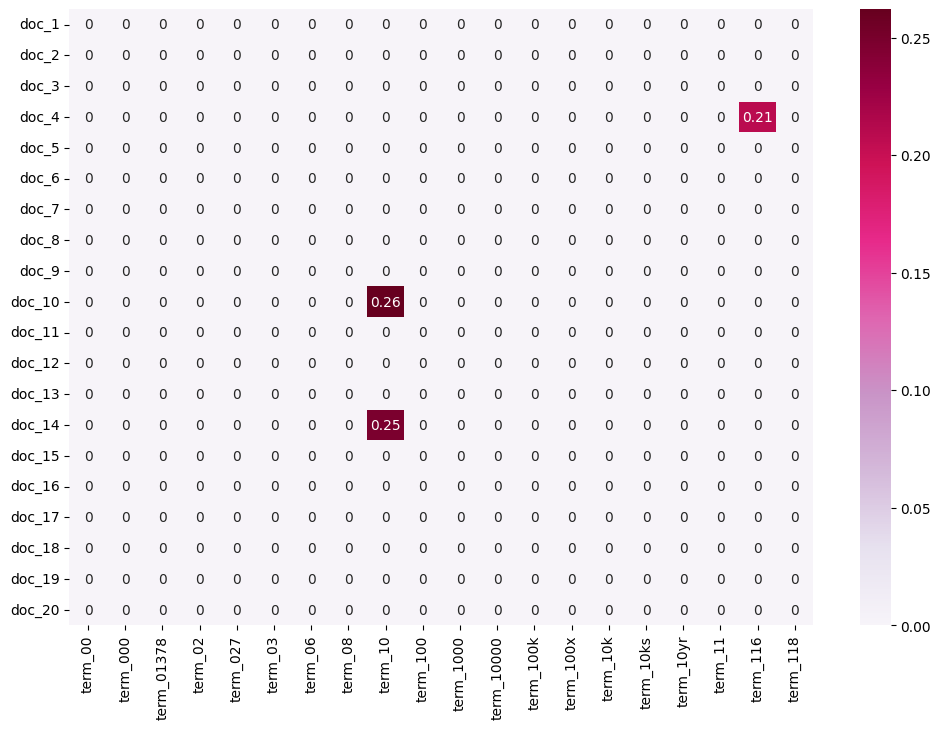

In [355]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X.text)  
plot_z = X_tfidf[0:20, 0:20].toarray()
plot_x = [f"term_{i}" for i in tfidf_vect.get_feature_names_out()[0:20]]
plot_y = [f"doc_{i+1}" for i in list(X.index)[0:20]]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="PuRd", annot=True)

## 4.4 Attribute transformation/aggregation

In [356]:
# transform text data
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]


np.int64(4)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



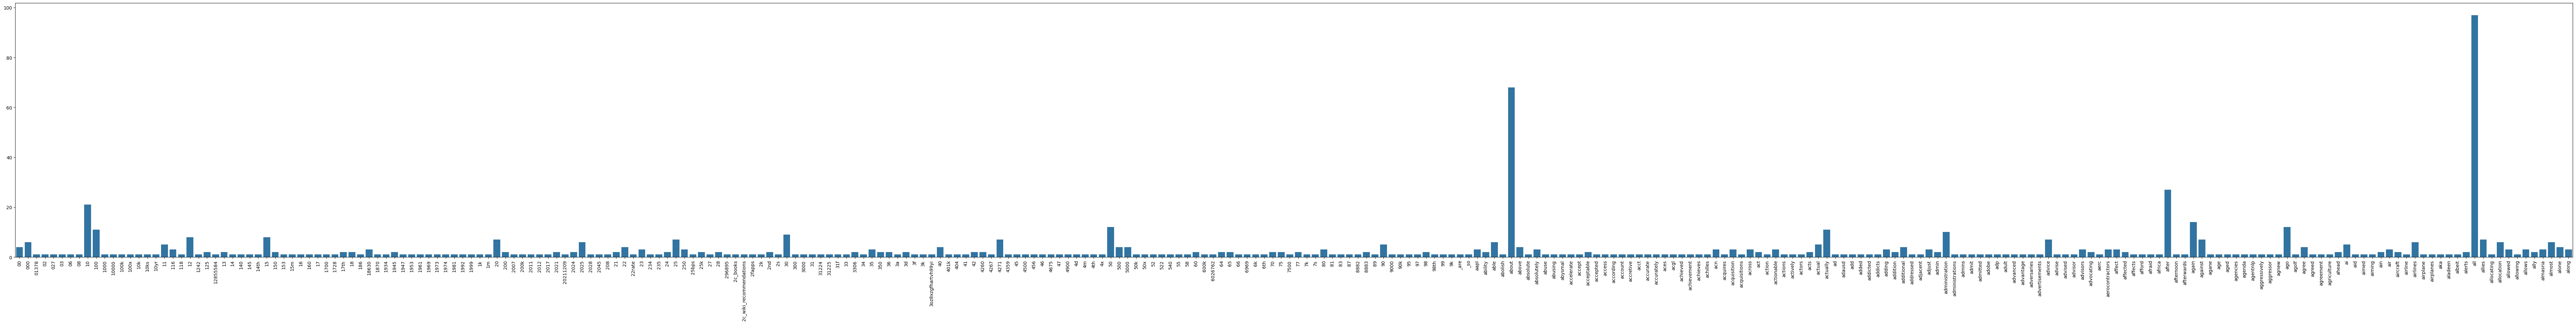

In [357]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## >>>Exercise 12

In [358]:
# interactive visualization
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
fig.show()

## >>>Exercise 13

畫前50個高頻詞的長條圖

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/2825206399.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



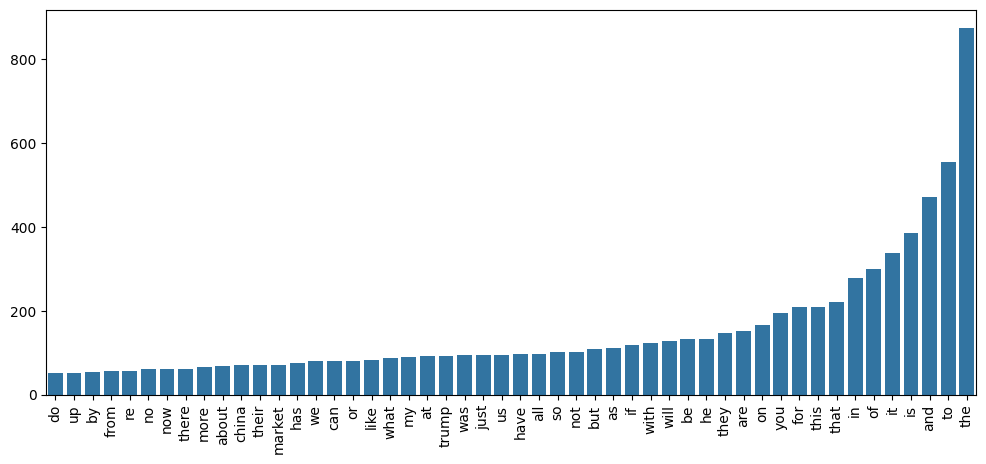

In [359]:
plt.subplots(figsize=(12, 5))
top_N = 50
top_order = np.argsort(term_frequencies)[-top_N:]
g = sns.barplot(x=count_vect.get_feature_names_out()[top_order], y=term_frequencies[top_order])
g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);

## >>>Exercise 14

轉成左尾分布型態

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/824715448.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



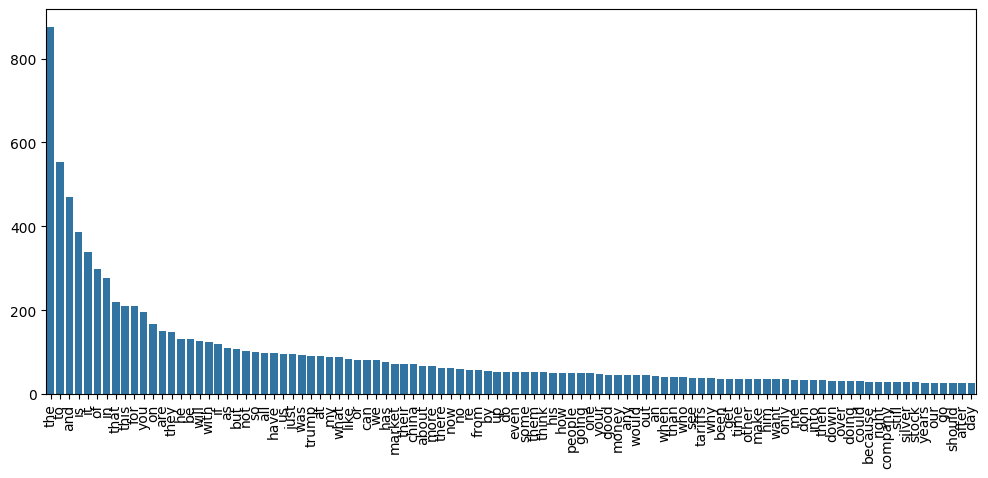

In [360]:
plt.subplots(figsize=(12, 5))
top_N = 100
top_order = np.argsort(term_frequencies)[-top_N:][::-1]
g = sns.barplot(x=count_vect.get_feature_names_out()[top_order], y=term_frequencies[top_order])
g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);

In [361]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



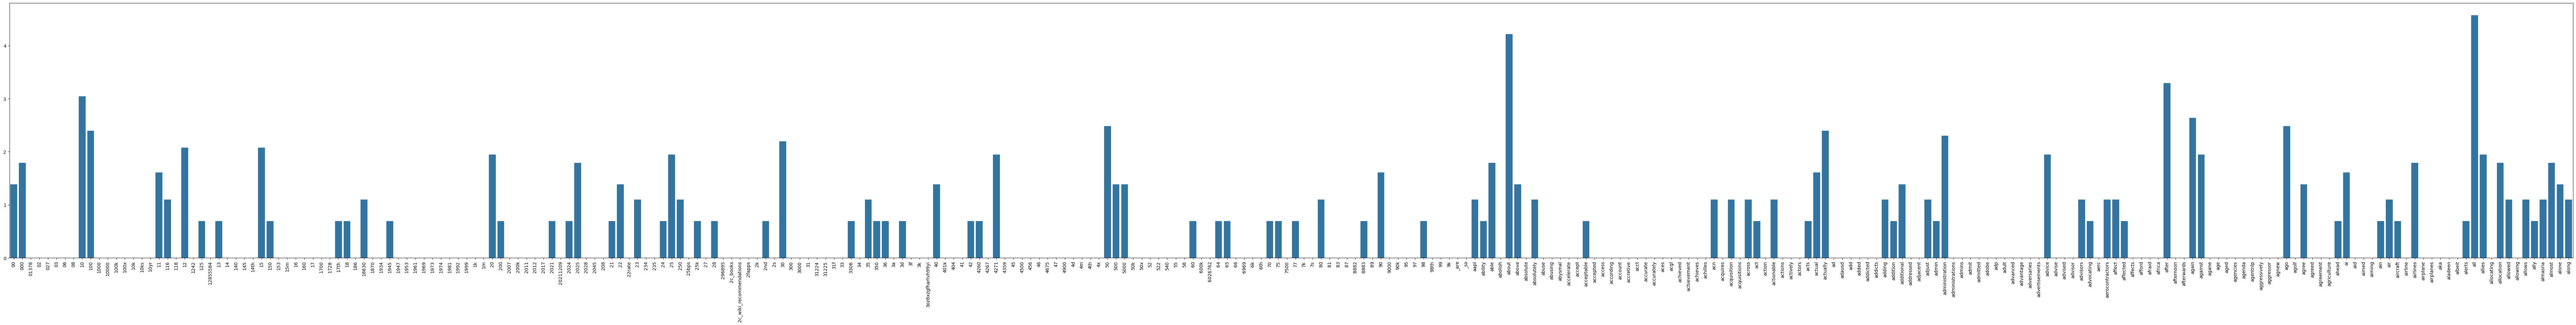

In [362]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## >>>Exercise 15

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/4248987528.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



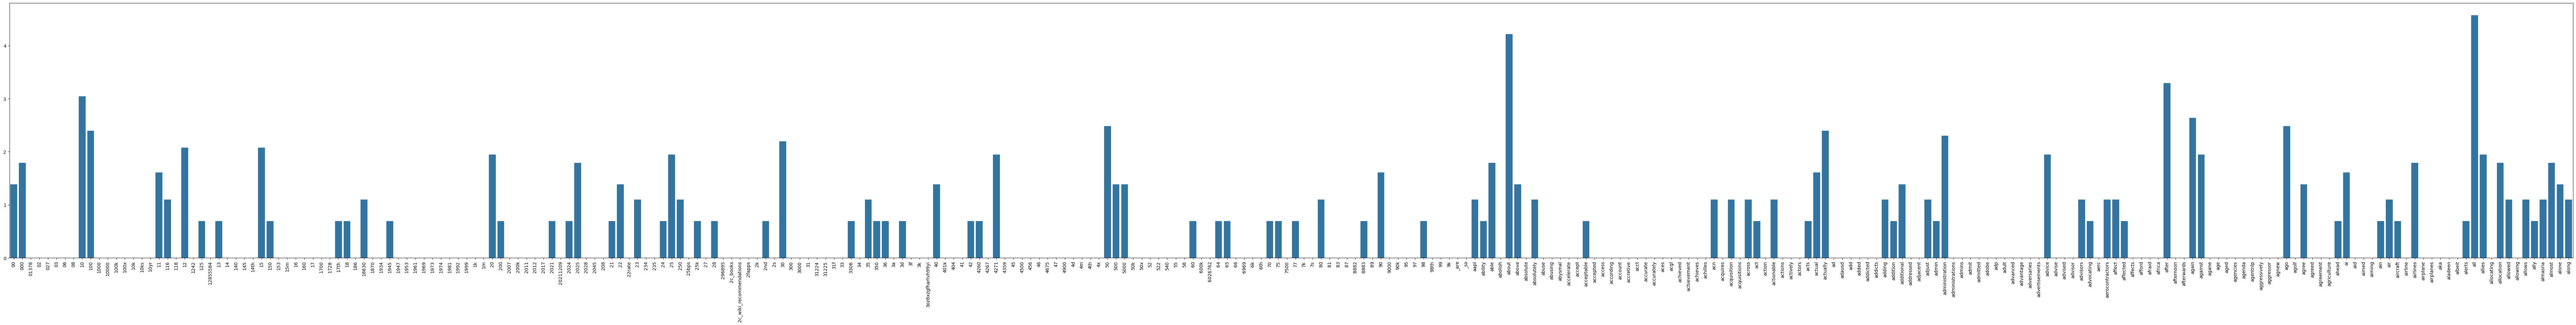

In [363]:
# Answer here
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Phase 2

In [364]:
### Begin Assignment Here

### second part:

In [365]:
X

text  label label_name  \
0                                     Calls on retards   -1.0   negative   
1    Stunt as in like why did they even make a big ...    0.0    neutral   
2                    Seeing lots of red in the ticker.    0.0    neutral   
3    Vision Marine Technologies Inc. is rewriting t...    1.0   positive   
4                             He didn’t say thank you.   -1.0   negative   
..                                                 ...    ...        ...   
841  So countries “begging to stop the tariffs” and...    1.0   positive   
842        Invest now it is going to shoot up tomorrow    1.0   positive   
843                             Where can I read this?    0.0    neutral   
845  i sold my puts so i expect cheeto to declare w...   -1.0   negative   
846                       ![img](emote|t5_2th52|31224)    0.0    neutral   

                                              unigrams  
0                                 [Calls, on, retards]  
1    [Stunt, as, in, like, why, did, they, even, ma...  
2          [Seeing, lots, of, red, in, the, ticker, .]  
3    [Vision, Marine, Technologies, Inc., is, rewri...  
4                 [He, didn, ’, t, say, thank, you, .]  
..                                                 ...  
841  [So, countries, “, begging, to, stop, the, tar...  
842  [Invest, now, it, is, going, to, shoot, up, to...  
843                     [Where, can, I, read, this, ?]  
845  [i, sold, my, puts, so, i, expect, cheeto, to,...  
846         [!, [, img, ], (, emote|t5_2th52|31224, )]  

[813 rows x 4 columns]

In [366]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each label
labels = X['label_name'].unique()  # Get unique labels
label_dfs = {}  # Dictionary to store DataFrames for each label

for label in labels:
    # Filter the original DataFrame by label
    label_dfs[label] = X[X['label_name'] == label].copy()

# Function to create term-document frequency DataFrame for each label
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each label
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each label

for label in labels:
    filt_term_document_dfs[label] = create_term_document_df(label_dfs[label])

In [367]:
# Display the filtered DataFrame for one of the labels
label_number=0 
print(f"Filtered Term-Document Frequency DataFrame for label {labels[label_number]}:")
filt_term_document_dfs[labels[label_number]]

Filtered Term-Document Frequency DataFrame for label negative:


000  02  03  10  100  1000  10000  11  12  13  ...  years  yet  yields  \
0      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
1      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
2      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
3      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
4      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
..   ...  ..  ..  ..  ...   ...    ...  ..  ..  ..  ...    ...  ...     ...   
310    0   1   1   0    0     0      0   0   0   1  ...      0    0       0   
311    0   0   0   0    0     0      0   0   0   0  ...      1    0       0   
312    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
313    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
314    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   

     yippee  yo  you  your  yourselves  youtube  zero  
0         0   0    0     0           0        0     0  
1         0   0    1     0           0        0     0  
2         0   0    0     0           0        0     0  
3         0   0    0     0           0        0     0  
4         0   0    0     0           0        0     0  
..      ...  ..  ...   ...         ...      ...   ...  
310       0   0    0     0           0        0     0  
311       0   0    0     0           0        0     0  
312       0   0    0     0           0        0     0  
313       0   0    0     0           0        0     0  
314       0   0    0     0           0        0     0  

[315 rows x 2192 columns]

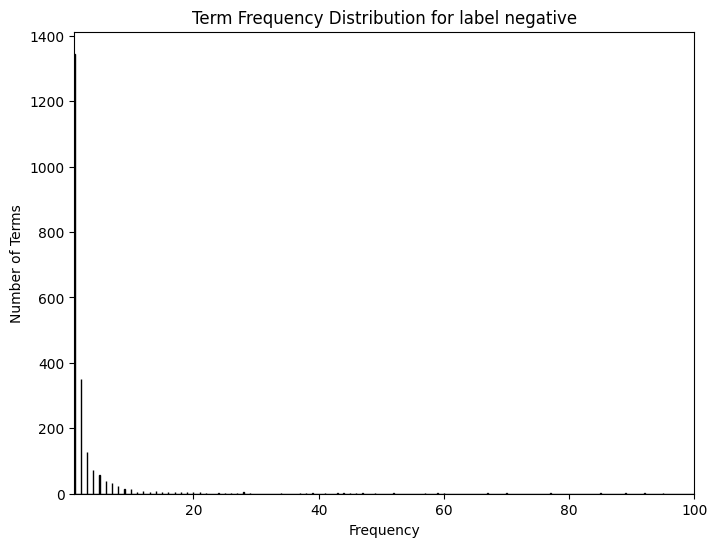

In [368]:
 # Sum over all documents to get total frequency for each word
label_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[labels[label_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for label {labels[label_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()

In [369]:
label_number=0
word_counts = filt_term_document_dfs[labels[label_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[labels[label_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Label name: {labels[label_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Label name: negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'or', 'about', 'even', 'no', 'people', 'there', 'like', 'market', 'my', 'more', 'him', 'them', 'think', 'going', 'now', 'money', 'one', 'would', 'how', 'make', 're', 'do', 'out', 'an', 'down', 'than', 'up', 'other', 'economy', 'from', 'tariffs', 'when', 'by', 'get', 'then', 'who', 'doing', 'over', 'some', 'trade', 'been', 'don', 'fuck', 'doesn', 'see', 'still', 'only', 'why', 'time', 'world', 'any', 'really', 'because', 'our', 'good', 'go', 'back', 'xi', 'point', 'american', 'wants', 'your', 'never', 'everyone', 'much', 'could', 'me', 'shit', 'literally', 'most', 'these', 'bad']


In [370]:
sorted_counts

array([409, 231, 193, ...,   1,   1,   1], shape=(2192,))

In [371]:
sorted_indices

array([1918, 1956,  137, ...,  960, 1705, 1095], shape=(2192,))

In [372]:
filt_term_document_dfs[labels[label_number]].loc[:,'the'].sum(axis=0) 

np.int64(409)

In [373]:
label_number=-1 
word_counts = filt_term_document_dfs[labels[label_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[labels[label_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Label name: {labels[label_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Label name: positive
Number of terms in top 5%: 58
Filtered terms: ['the', 'and', 'to', 'is', 'in', 'it', 'for', 'on', 'this', 'with', 'of', 'you', 'that', 'but', 'just', 'they', 'if', 'more', 'can', 'good', 'be', 'have', 'my', 'are', 'their', 'so', 'some', 'technology', 'at', 'star', 'now', 'from', 'by', 'up', 'about', 'time', 'lithium', 'like', 'doing', 'was', 'going', 'think', 're', 'he', 'one', 'all', 'not', 'we', 'trump', 'only', 'as', 'aviation', 'will', 'or', 'potential', 'analysis', 'inflight', 'us']


In [374]:
label_number=1
word_counts = filt_term_document_dfs[labels[label_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[labels[label_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Label name: {labels[label_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")



Label name: neutral
Number of terms in top 5%: 135
Filtered terms: ['the', 'to', 'and', 'it', 'is', 'of', 'in', 'you', 'that', 'for', 'this', 'on', 'they', 'are', 'if', 'with', 'as', 'my', 'be', 'was', 'like', 'not', 'but', 'or', 'what', 'at', 'all', 'so', 'market', 'have', 'just', 'us', 'we', 'he', 'will', 'can', 'do', 'your', 'about', 'no', 'from', 'now', 're', 'there', 'any', 'more', 'their', 'by', 'has', 'how', 'trump', 'up', 'some', 'china', 'why', 'company', 'want', 'even', 'who', 'them', 'people', 'money', 'would', 'out', 'an', 'into', 'were', 'when', 'one', 'year', 'good', 'think', 'stock', 'me', 'see', 'going', 'did', 'stocks', 'than', 'could', 'been', '10', 'first', 'new', 'don', 'other', 'right', 'its', 'x200b', 'years', 'get', 'then', 'know', 'silver', 'call', 'tariffs', 'does', 'here', 'day', 'over', 'price', 'too', 'time', 'should', 'also', 'much', 'off', 'only', 'since', 'before', 'because', 've', 't5_2th52', 'make', 'img', 'after', 'last', 'which', 'companies', 'emote',

In [375]:
label_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each label
term_document_dfs = {}

for label in labels:
    print(f'\nFor label {label} we filter the following words:')
    term_document_dfs[label] = filter_top_bottom_words_by_sum(filt_term_document_dfs[label])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for label {labels[label_number]}:")
term_document_dfs[labels[label_number]]



For label negative we filter the following words:
Bottom 1.0% words: 
knowing         1
shame           1
housing         1
sheet           1
shel            1
hour            1
hostility       1
hosed           1
horrible        1
hopefully       1
hope            1
hood            1
shell           1
honest          1
homelessness    1
shelves         1
home            1
holy            1
huh             1
humans          1
humphrey        1
dtype: int64
Top 5.0% words: 
bad           11
these         11
most          12
literally     12
shit          12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For label neutral we filter the following words:
Bottom 1.0% words: 
joby          1
myers         1
mutual        1
muscles       1
multiple      1
multikine     1
multi         1
msci          1
mpm           1
movies        1
moves         1
moved         1
mouth         1
mou           1
nacs          

000  02  03  10  100  1000  10000  11  12  13  ...  yeah  year  years  \
0      0   0   0   0    0     0      0   0   0   0  ...     0     0      0   
1      0   0   0   0    0     0      0   0   0   0  ...     0     0      0   
2      0   0   0   0    0     0      0   0   0   0  ...     0     0      0   
3      0   0   0   0    0     0      0   0   0   0  ...     0     0      0   
4      0   0   0   0    0     0      0   0   0   0  ...     0     0      0   
..   ...  ..  ..  ..  ...   ...    ...  ..  ..  ..  ...   ...   ...    ...   
310    0   1   1   0    0     0      0   0   0   1  ...     0     0      0   
311    0   0   0   0    0     0      0   0   0   0  ...     0     0      1   
312    0   0   0   0    0     0      0   0   0   0  ...     0     0      0   
313    0   0   0   0    0     0      0   0   0   0  ...     0     0      0   
314    0   0   0   0    0     0      0   0   0   0  ...     0     0      0   

     yet  yields  yippee  yo  yourselves  youtube  zero  
0      0       0       0   0           0        0     0  
1      0       0       0   0           0        0     0  
2      0       0       0   0           0        0     0  
3      0       0       0   0           0        0     0  
4      0       0       0   0           0        0     0  
..   ...     ...     ...  ..         ...      ...   ...  
310    0       0       0   0           0        0     0  
311    0       0       0   0           0        0     0  
312    0       0       0   0           0        0     0  
313    0       0       0   0           0        0     0  
314    0       0       0   0           0        0     0  

[315 rows x 2062 columns]

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each label and comment about the differences and similarities that you can see.

In [376]:
# answer
"""
- Common observation:
  Across all three sentiment classes, the top 5% most frequent words contain many English stopwords
  (e.g., "the", "to", "and") and colloquial tokens (e.g., "just", "now", "re").
  This indicates these words appear often regardless of sentiment and should be uniformly filtered out.

- Negative:
  In addition to generic terms, many high-frequency words express negative emotion or policy-related content,
  such as "fuck", "shit", "literally", "tariffs", "economy", as well as references to political figures
  like "trump" and "xi". These suggest negative posts often focus on complaints about policies or people.

- Positive:
  The set of high-frequency words is smaller. Beyond common stopwords, it includes positive or
  industry-related keywords such as "good", "technology", "lithium", "aviation", and "inflight".

- Neutral:
  This list is the longest and includes many finance-related terms ("market", "stock", "stocks",
  "price", "companies", "portfolio"), temporal/numeric tokens ("year", "years", "week", "10"),
  and even Reddit repost-format symbols ("x200b", "img", "emote"). This indicates neutral posts
  are often objective information or quoted articles.

-> Overall:
  While high-frequency vocabularies are dominated by stopwords across classes, the negative class
  contains more emotional terms, the positive class includes domain-specific positive nouns, and the
  neutral class is dominated by financial terms and formatting tokens. These differences can guide
  subsequent feature selection or sentiment analysis.
"""


'\n- Common observation:\n  Across all three sentiment classes, the top 5% most frequent words contain many English stopwords\n  (e.g., "the", "to", "and") and colloquial tokens (e.g., "just", "now", "re").\n  This indicates these words appear often regardless of sentiment and should be uniformly filtered out.\n\n- Negative:\n  In addition to generic terms, many high-frequency words express negative emotion or policy-related content,\n  such as "fuck", "shit", "literally", "tariffs", "economy", as well as references to political figures\n  like "trump" and "xi". These suggest negative posts often focus on complaints about policies or people.\n\n- Positive:\n  The set of high-frequency words is smaller. Beyond common stopwords, it includes positive or\n  industry-related keywords such as "good", "technology", "lithium", "aviation", and "inflight".\n\n- Neutral:\n  This list is the longest and includes many finance-related terms ("market", "stock", "stocks",\n  "price", "companies", "por

In [377]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for label in term_document_dfs:
    # Replace dots with underscores in the label name to avoid errors in the file creation
    label_safe = label.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[label])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{label_safe}.csv', '>=', 1)
    print(f'td_freq_db_{label_safe}.csv')


td_freq_db_negative.csv
td_freq_db_neutral.csv
td_freq_db_positive.csv


Database size (total no of transactions) : 314
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.856687898089172
Maximum Transaction Size : 138
Standard Deviation Transaction Size : 13.310901494043184
Variance in Transaction Sizes : 177.74616918662625
Sparsity : 0.9942499088758054


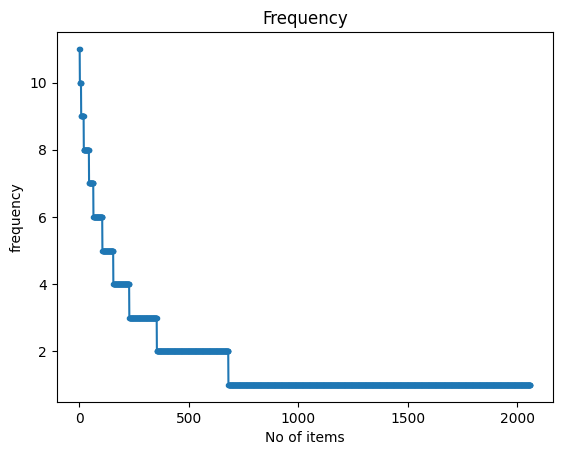

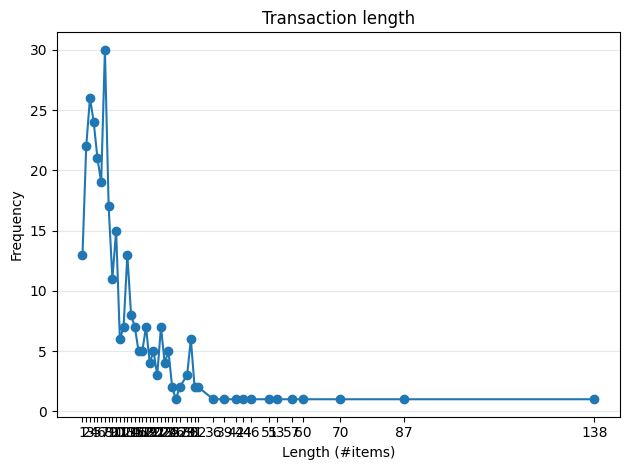

In [378]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 106
Number of items : 1099
Minimum Transaction Size : 1
Average Transaction Size : 14.537735849056604
Maximum Transaction Size : 91
Standard Deviation Transaction Size : 16.89433003485047
Variance in Transaction Sizes : 288.1366576819407
Sparsity : 0.9867718509107766


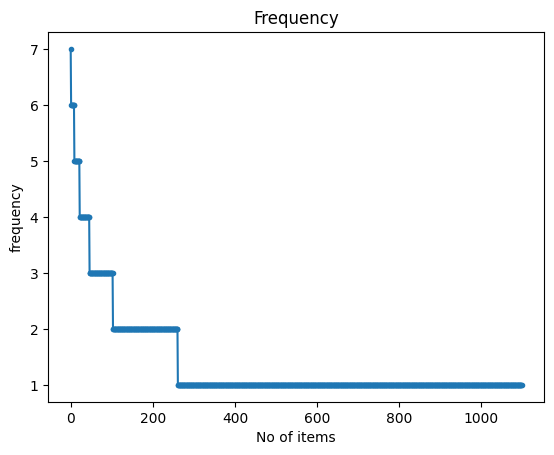

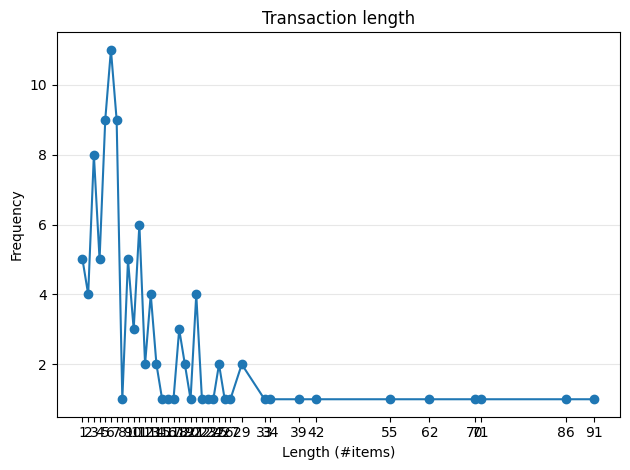

In [379]:
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 381
Number of items : 2543
Minimum Transaction Size : 1
Average Transaction Size : 10.968503937007874
Maximum Transaction Size : 199
Standard Deviation Transaction Size : 18.74652178043057
Variance in Transaction Sizes : 352.35690012432656
Sparsity : 0.9956867857109682


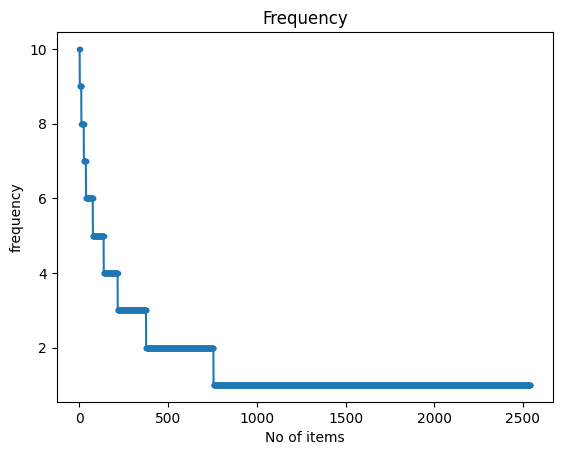

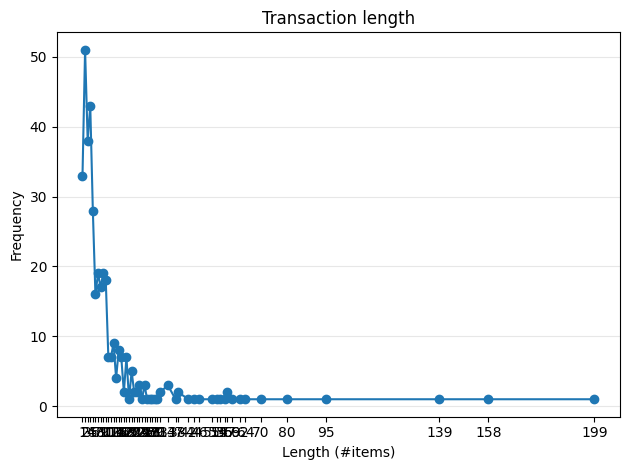

In [380]:
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

由於資料集規模縮小，因此將原本設定的minSup=9 ->minSup=6

In [381]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 105
Runtime: 0.0047910213470458984


In [382]:
obj1.save('freq_patterns_negative_minSup6.txt') #save the patterns
frequentPatternsDF_negative

Patterns  Support
0        calls        6
1    companies        6
2          lot        6
3         next        6
4        first        6
..         ...      ...
100       sure       10
101     should       10
102      again       10
103    already       11
104      after       11

[105 rows x 2 columns]

In [383]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_positive= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9
Runtime: 0.0005581378936767578


In [384]:
obj2.save('freq_patterns_positive_minSup6.txt') #save the patterns
frequentPatternsDF_positive

Patterns  Support
0     into        6
1     your        6
2    there        6
3     them        6
4      out        6
5      see        6
6  economy        6
7      way        6
8      has        7

In [385]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 77
Runtime: 0.0025110244750976562


In [386]:
obj2.save('freq_patterns_neutral_minSup6.txt') #save the patterns
frequentPatternsDF_neutral

Patterns  Support
0        big        6
1       talk        6
2     months        6
3   probably        6
4      doing        6
..       ...      ...
72        ll        9
73        am        9
74       few        9
75      well       10
76       his       10

[77 rows x 2 columns]

In [387]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_positive, frequentPatternsDF_negative, frequentPatternsDF_neutral]


# Identify patterns that appear in more than one label
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all labels
total_patterns_count= sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each label, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
88     after       11
143      his       10
83      here       10
84       day       10
85      sure       10
..       ...      ...
19     makes        6
20       had        6
21       put        6
22      rest        6
0       your        6

[144 rows x 2 columns]
Number of patterns discarded: 47


In [388]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  01378  02  027  03  06  08  10  100  ...  months  talk  guy  \
0     0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
1     0    0      0   0    0   0   0   0   0    0  ...       0     1    0   
2     0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
3     0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
4     0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...     ...   ...  ...   
841   0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
842   0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
843   0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
845   0    0      0   0    0   0   0   0   0    0  ...       0     0    0   
846   0    0      0   0    0   0   0   0   0    0  ...       0     0    0   

     else  investment  makes  had  put  rest  your  
0       0           0      0    0    0     0     0  
1       0           0      0    0    0     0     0  
2       0           0      0    0    0     0     0  
3       0           0      0    0    0     0     1  
4       0           0      0    0    0     0     0  
..    ...         ...    ...  ...  ...   ...   ...  
841     0           0      0    0    0     0     0  
842     0           0      0    0    0     0     0  
843     0           0      0    0    0     0     0  
845     0           0      0    0    0     0     0  
846     0           0      0    0    0     0     0  

[813 rows x 4457 columns]

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'negative' label in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [389]:
# Answer Here
# FAE Top-K（k = 200, 400, 600）
from PAMI.frequentPattern.topk import FAE as alg
frequentPatternsDF_topk = {}

for k in [200, 400, 600]:
    print(f'\n=== FAE Top-K | k = {k} ===')
    obj = alg.FAE(iFile='td_freq_db_negative.csv', k=k)
    obj.mine()
    frequentPatternsDF_topk[k] = obj.getPatternsAsDataFrame()
    
    print('Total No of patterns: ' + str(len(df)))
    print('Runtime: ' + str(obj.getRuntime()))


=== FAE Top-K | k = 200 ===
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 77
Runtime: 0.004965066909790039

=== FAE Top-K | k = 400 ===
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 77
Runtime: 0.047471046447753906

=== FAE Top-K | k = 600 ===
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 77
Runtime: 0.07738327980041504


In [390]:
obj.save(f'freq_patterns_negative_topk{200}.txt')
print(f'\nFAE Top-K | k = 200\n{frequentPatternsDF_topk[200]}')


FAE Top-K | k = 200
       Patterns  Support
0       already       11
1         after       11
2        things       10
3          here       10
4           day       10
..          ...      ...
195         due        4
196      fucked        4
197       stuff        4
198  understand        4
199       whole        4

[200 rows x 2 columns]


In [391]:
obj.save(f'freq_patterns_negative_topk{400}.txt')
print(f'\nFAE Top-K | k = 400\n{frequentPatternsDF_topk[400]}')


FAE Top-K | k = 400
                   Patterns  Support
0                   already       11
1                     after       11
2                    things       10
3                      here       10
4                       day       10
..                      ...      ...
395             since haven        3
396        actually looking        3
397              rest years        3
398  fucking administration        3
399      treasuries selling        3

[400 rows x 2 columns]


In [392]:
obj.save(f'freq_patterns_negative_topk{600}.txt')
print(f'\nFAE Top-K | k = 600\n{frequentPatternsDF_topk[600]}')


FAE Top-K | k = 600
      Patterns  Support
0      already       11
1        after       11
2       things       10
3         here       10
4          day       10
..         ...      ...
595       real        2
596  preparing        2
597     single        2
598       year        2
599    declare        2

[600 rows x 2 columns]


In [393]:
# MaxFPGrowth（minSup = 3, 6, 9）
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
frequentPatternsDF_max = {}

for minSup in [3, 6, 9]:
    print(f'\n=== MaxFPGrowth | minSup = {minSup} ===')
    obj = alg.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
    obj.mine()
    frequentPatternsDF_max[minSup] = obj.getPatternsAsDataFrame()
    
    print('Total No of patterns: ' + str(len(df)))
    print('Runtime: ' + str(obj.getRuntime()))



=== MaxFPGrowth | minSup = 3 ===
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 77
Runtime: 0.004817962646484375

=== MaxFPGrowth | minSup = 6 ===
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 77
Runtime: 0.00180816650390625

=== MaxFPGrowth | minSup = 9 ===
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 77
Runtime: 0.0010030269622802734


In [394]:
obj.save(f'freq_patterns_negative_maxSup{3}.txt')
print(f'\nMaxFPGrowth | minSup = 3\n{frequentPatternsDF_max[3]}')


MaxFPGrowth | minSup = 3
          Patterns  Support
0           being         3
1          leader         3
2        remember         3
3            fair         3
4          beyond         3
..             ...      ...
328           end         9
329        should        10
330          sure        10
331           day        10
332  already here         3

[333 rows x 2 columns]


In [395]:
obj.save(f'freq_patterns_negative_maxSup{6}.txt')
print(f'\nMaxFPGrowth | minSup = 6\n{frequentPatternsDF_max[6]}')


MaxFPGrowth | minSup = 6
     Patterns  Support
0      gonna         6
1    trading         6
2       lost         6
3     silver         6
4     though         6
..        ...      ...
100      day        10
101     here        10
102   things        10
103    after        11
104  already        11

[105 rows x 2 columns]


In [396]:
obj.save(f'freq_patterns_negative_maxSup{9}.txt')
print(f'\nMaxFPGrowth | minSup = 9\n{frequentPatternsDF_max[9]}')


MaxFPGrowth | minSup = 9
    Patterns  Support
0     great         9
1      into         9
2      week         9
3      well         9
4   america         9
5      last         9
6      same         9
7      want         9
8     seems         9
9       off         9
10    right         9
11      end         9
12    again        10
13   should        10
14     sure        10
15      day        10
16     here        10
17   things        10
18    after        11
19  already        11


In [397]:
# answer
"""
Differences & Similarities
Using FPGrowth as the baseline, with minSup = 6 we found a total of 105 frequent itemsets.

- FAE Top-K:
  - At K = 200, only itemsets with support ≥ 4 remain.
  - At K = 400, itemsets with support = 3 begin to appear (e.g., "fucking administration").
  - At K = 600, all itemsets with support ≥ 2 are listed.
  - Overall, Top-K results are essentially a "ranked subset" of the FPGrowth list; when K exceeds
    the number of patterns produced by FPGrowth, no new patterns are discovered—only lower-support
    itemsets are filled in.

- MaxFPGrowth:
  - Retains only maximal frequent itemsets, so the count is clearly smaller.
  - With minSup = 3, we obtain 333 maximal sets (e.g., "already here").
  - With minSup = 6, this shrinks to 105, nearly overlapping with FPGrowth’s common itemsets.
  - With minSup = 9, only 20 high-support single words remain (e.g., "already", "after", "day",
    "here", "sure", "should", …).

- Summary:
  - FPGrowth provides the complete set of frequent itemsets.
  - FAE Top-K controls output size via ranking; lower-support patterns only emerge at higher K.
  - MaxFPGrowth keeps only maximal sets—fewer in number but more representative.
  - The three methods have high overlap on high-support patterns, consistently capturing political,
    emotional, or market terms common in negative posts. They mainly differ in output scope,
    structure, and how subsets are filtered.
"""


'\nDifferences & Similarities\nUsing FPGrowth as the baseline, with minSup = 6 we found a total of 105 frequent itemsets.\n\n- FAE Top-K:\n  - At K = 200, only itemsets with support ≥ 4 remain.\n  - At K = 400, itemsets with support = 3 begin to appear (e.g., "fucking administration").\n  - At K = 600, all itemsets with support ≥ 2 are listed.\n  - Overall, Top-K results are essentially a "ranked subset" of the FPGrowth list; when K exceeds\n    the number of patterns produced by FPGrowth, no new patterns are discovered—only lower-support\n    itemsets are filled in.\n\n- MaxFPGrowth:\n  - Retains only maximal frequent itemsets, so the count is clearly smaller.\n  - With minSup = 3, we obtain 333 maximal sets (e.g., "already here").\n  - With minSup = 6, this shrinks to 105, nearly overlapping with FPGrowth’s common itemsets.\n  - With minSup = 9, only 20 high-support single words remain (e.g., "already", "after", "day",\n    "here", "sure", "should", …).\n\n- Summary:\n  - FPGrowth pr

In [398]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [399]:
X_pca_tdm.shape

(813, 2)

In [400]:
X_tsne_tdm.shape

(813, 2)

In [401]:
X_umap_tdm.shape

(813, 2)

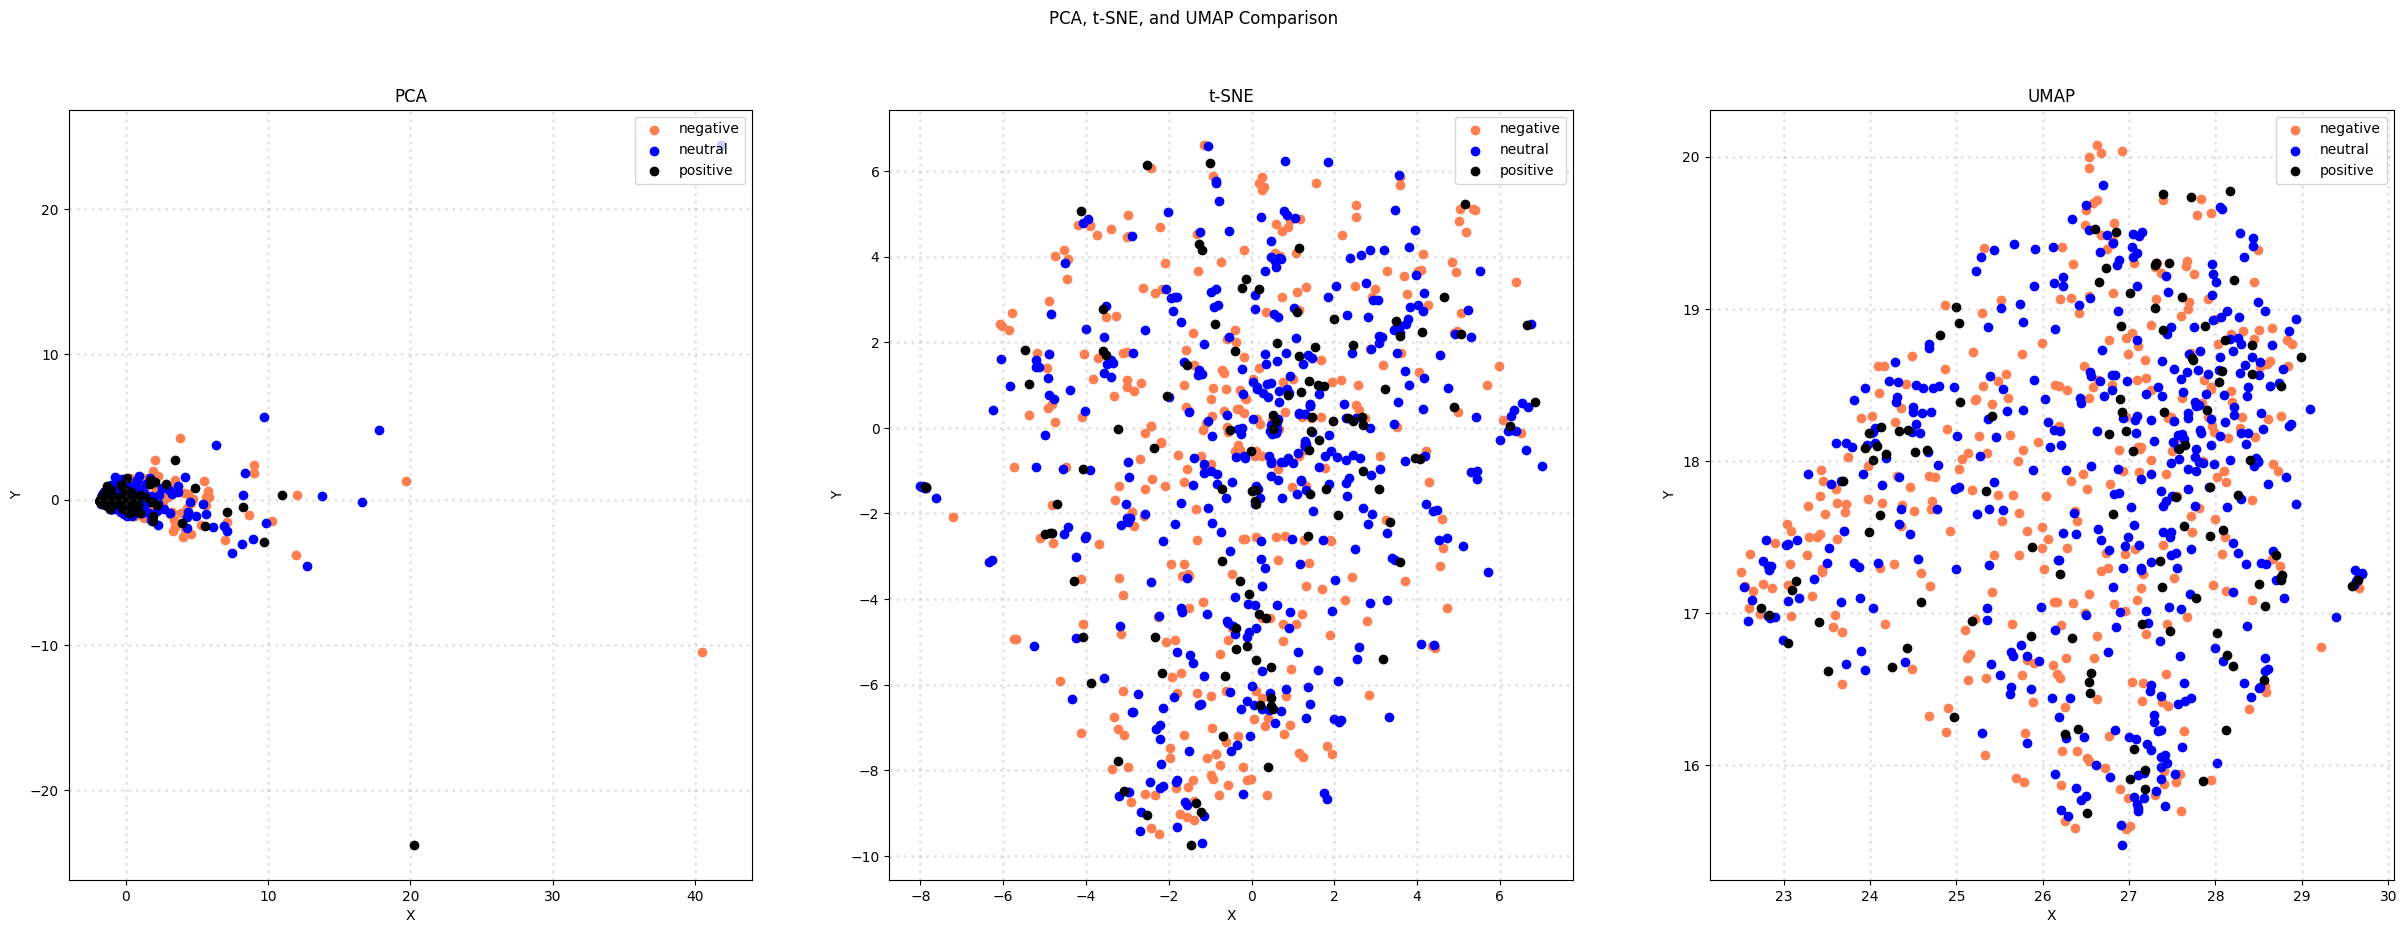

In [402]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = X['label_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, label in zip(col, categories):
        xs = X_reduced[X['label_name'] == label].T[0]
        ys = X_reduced[X['label_name'] == label].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=label)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [403]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

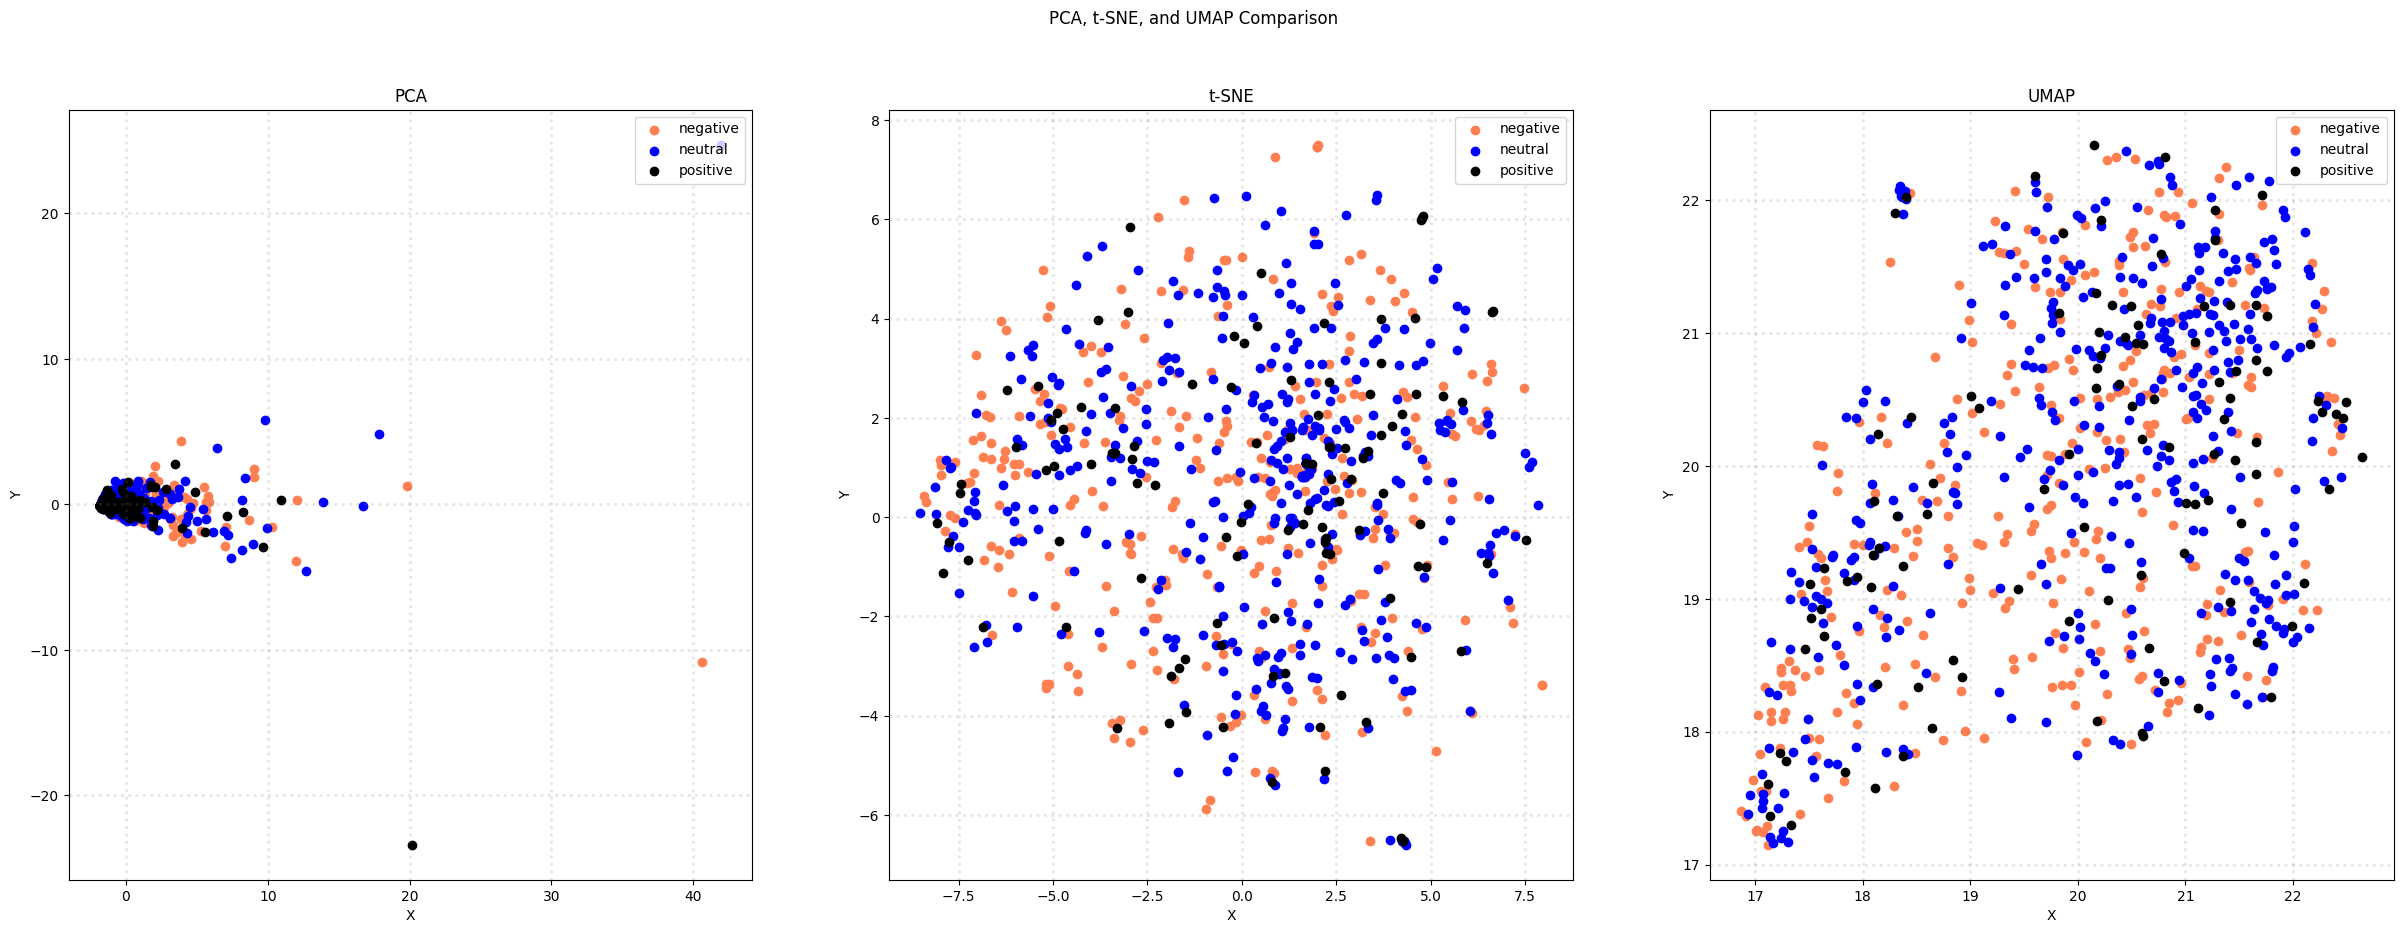

In [404]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = X['label_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, label in zip(col, categories):
        xs = X_reduced[X['label_name'] == label].T[0]
        ys = X_reduced[X['label_name'] == label].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=label)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [405]:
#Answer Here
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm_3 = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3 = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3 = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

In [406]:
X_pca_tdm_3.shape

(813, 3)

In [407]:
X_tsne_tdm_3.shape

(813, 3)

In [408]:
X_umap_tdm_3.shape

(813, 3)

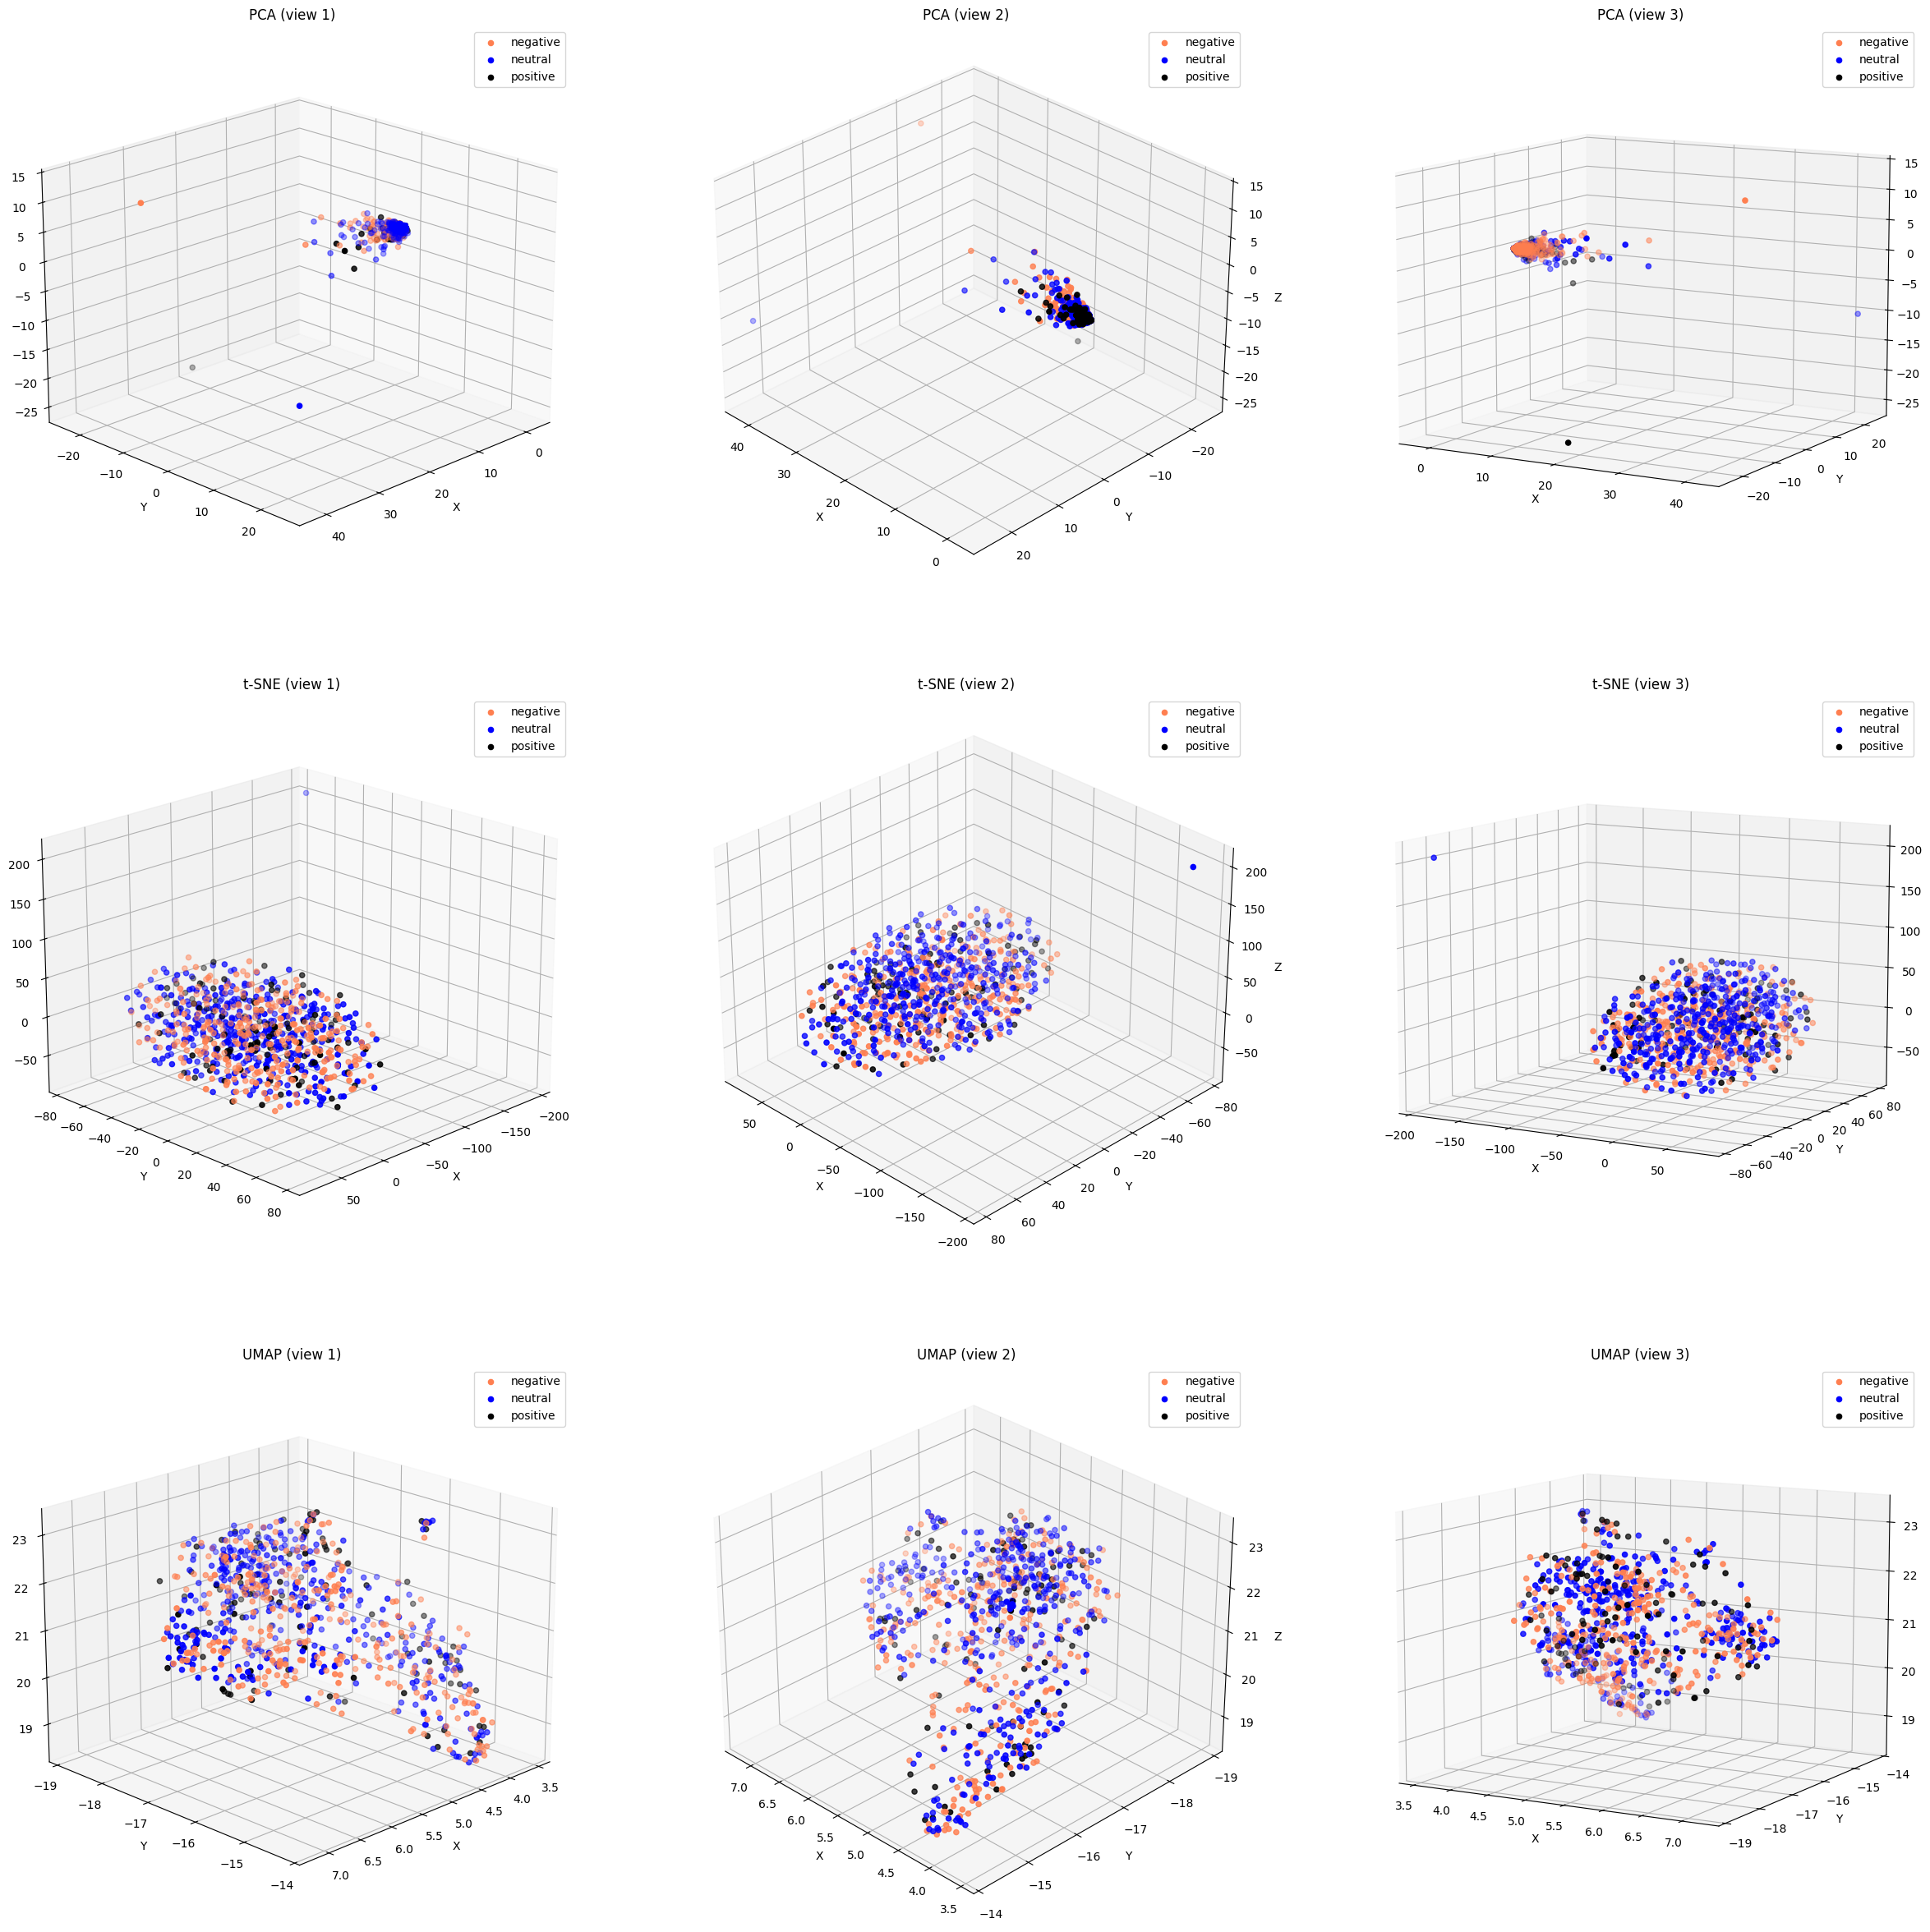

In [409]:
# Plot the results in subplots
from mpl_toolkits.mplot3d import Axes3D 
col = ['coral', 'blue', 'black']
categories = X['label_name'].unique() 

# Define a function to create a scatter plot for each method
def plot_scatter3d(ax, X_reduced, title, elev, azim):
    for c, label in zip(col, categories):
            xs = X_reduced[X['label_name'] == label].T[0]
            ys = X_reduced[X['label_name'] == label].T[1]
            zs = X_reduced[X['label_name'] == label].T[2]
            ax.scatter(xs, ys, zs, c=c, marker='o', label=label)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

fig = plt.figure(figsize=(30, 30))
angles = [(20, 45), (30, 135), (10, -60)]
methods = ['PCA', 't-SNE', 'UMAP']
reduced_data = [X_pca_tdm_3, X_tsne_tdm_3, X_umap_tdm_3]

for row, (method, data) in enumerate(zip(methods, reduced_data)):
    for col_idx, (elev, azim) in enumerate(angles):
        ax = fig.add_subplot(3, 3, row * 3 + col_idx + 1, projection='3d')
        plot_scatter3d(ax, data, f'{method} (view {col_idx + 1})', elev, azim)
        if row == 0 and col_idx == 0:
            ax.legend(loc='upper right')
plt.show()

In [410]:
# answer
"""
Observing distribution characteristics from different viewpoints across the three algorithms

1) PCA:
   - Regardless of the viewing angle, the three sentiment classes
     (positive / neutral / negative) remain clustered in the same cloud,
     with only occasional outliers.
   - This indicates the first three principal components are still dominated
     by generic terms and cannot separate the classes.

2) t-SNE:
   - From any angle, the embedding appears roughly spherical, with colors
     overlapping extensively.
   - Even with a third dimension, the structure remains similar to the 2D view,
     suggesting that inter-class neighborhood differences in the bag-of-words
     space are small.

3) UMAP:
   - The point cloud forms a thin sheet. From certain angles, the negative class
     clusters into a more noticeable bundle, while neutral and positive spread
     along the sheet.
   - Overall, the distribution is still highly mixed, indicating that pattern
     features may help local cohesion but do not yield clear boundaries.

-> Overall:
   All three dimensionality-reduction methods in 3D still show substantial
   overlap—especially PCA and t-SNE, which provide almost no visual class
   separation. UMAP shows slight clustering but with notable overlap.
   This suggests that sentiment classification on Reddit likely requires richer
   content and features; 3D visualizations offer limited cues and we must rely
   on classification models and additional features to achieve better accuracy.
"""


'\nObserving distribution characteristics from different viewpoints across the three algorithms\n\n1) PCA:\n   - Regardless of the viewing angle, the three sentiment classes\n     (positive / neutral / negative) remain clustered in the same cloud,\n     with only occasional outliers.\n   - This indicates the first three principal components are still dominated\n     by generic terms and cannot separate the classes.\n\n2) t-SNE:\n   - From any angle, the embedding appears roughly spherical, with colors\n     overlapping extensively.\n   - Even with a third dimension, the structure remains similar to the 2D view,\n     suggesting that inter-class neighborhood differences in the bag-of-words\n     space are small.\n\n3) UMAP:\n   - The point cloud forms a thin sheet. From certain angles, the negative class\n     clusters into a more noticeable bundle, while neutral and positive spread\n     along the sheet.\n   - Overall, the distribution is still highly mixed, indicating that pattern\n  

In [411]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_3_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

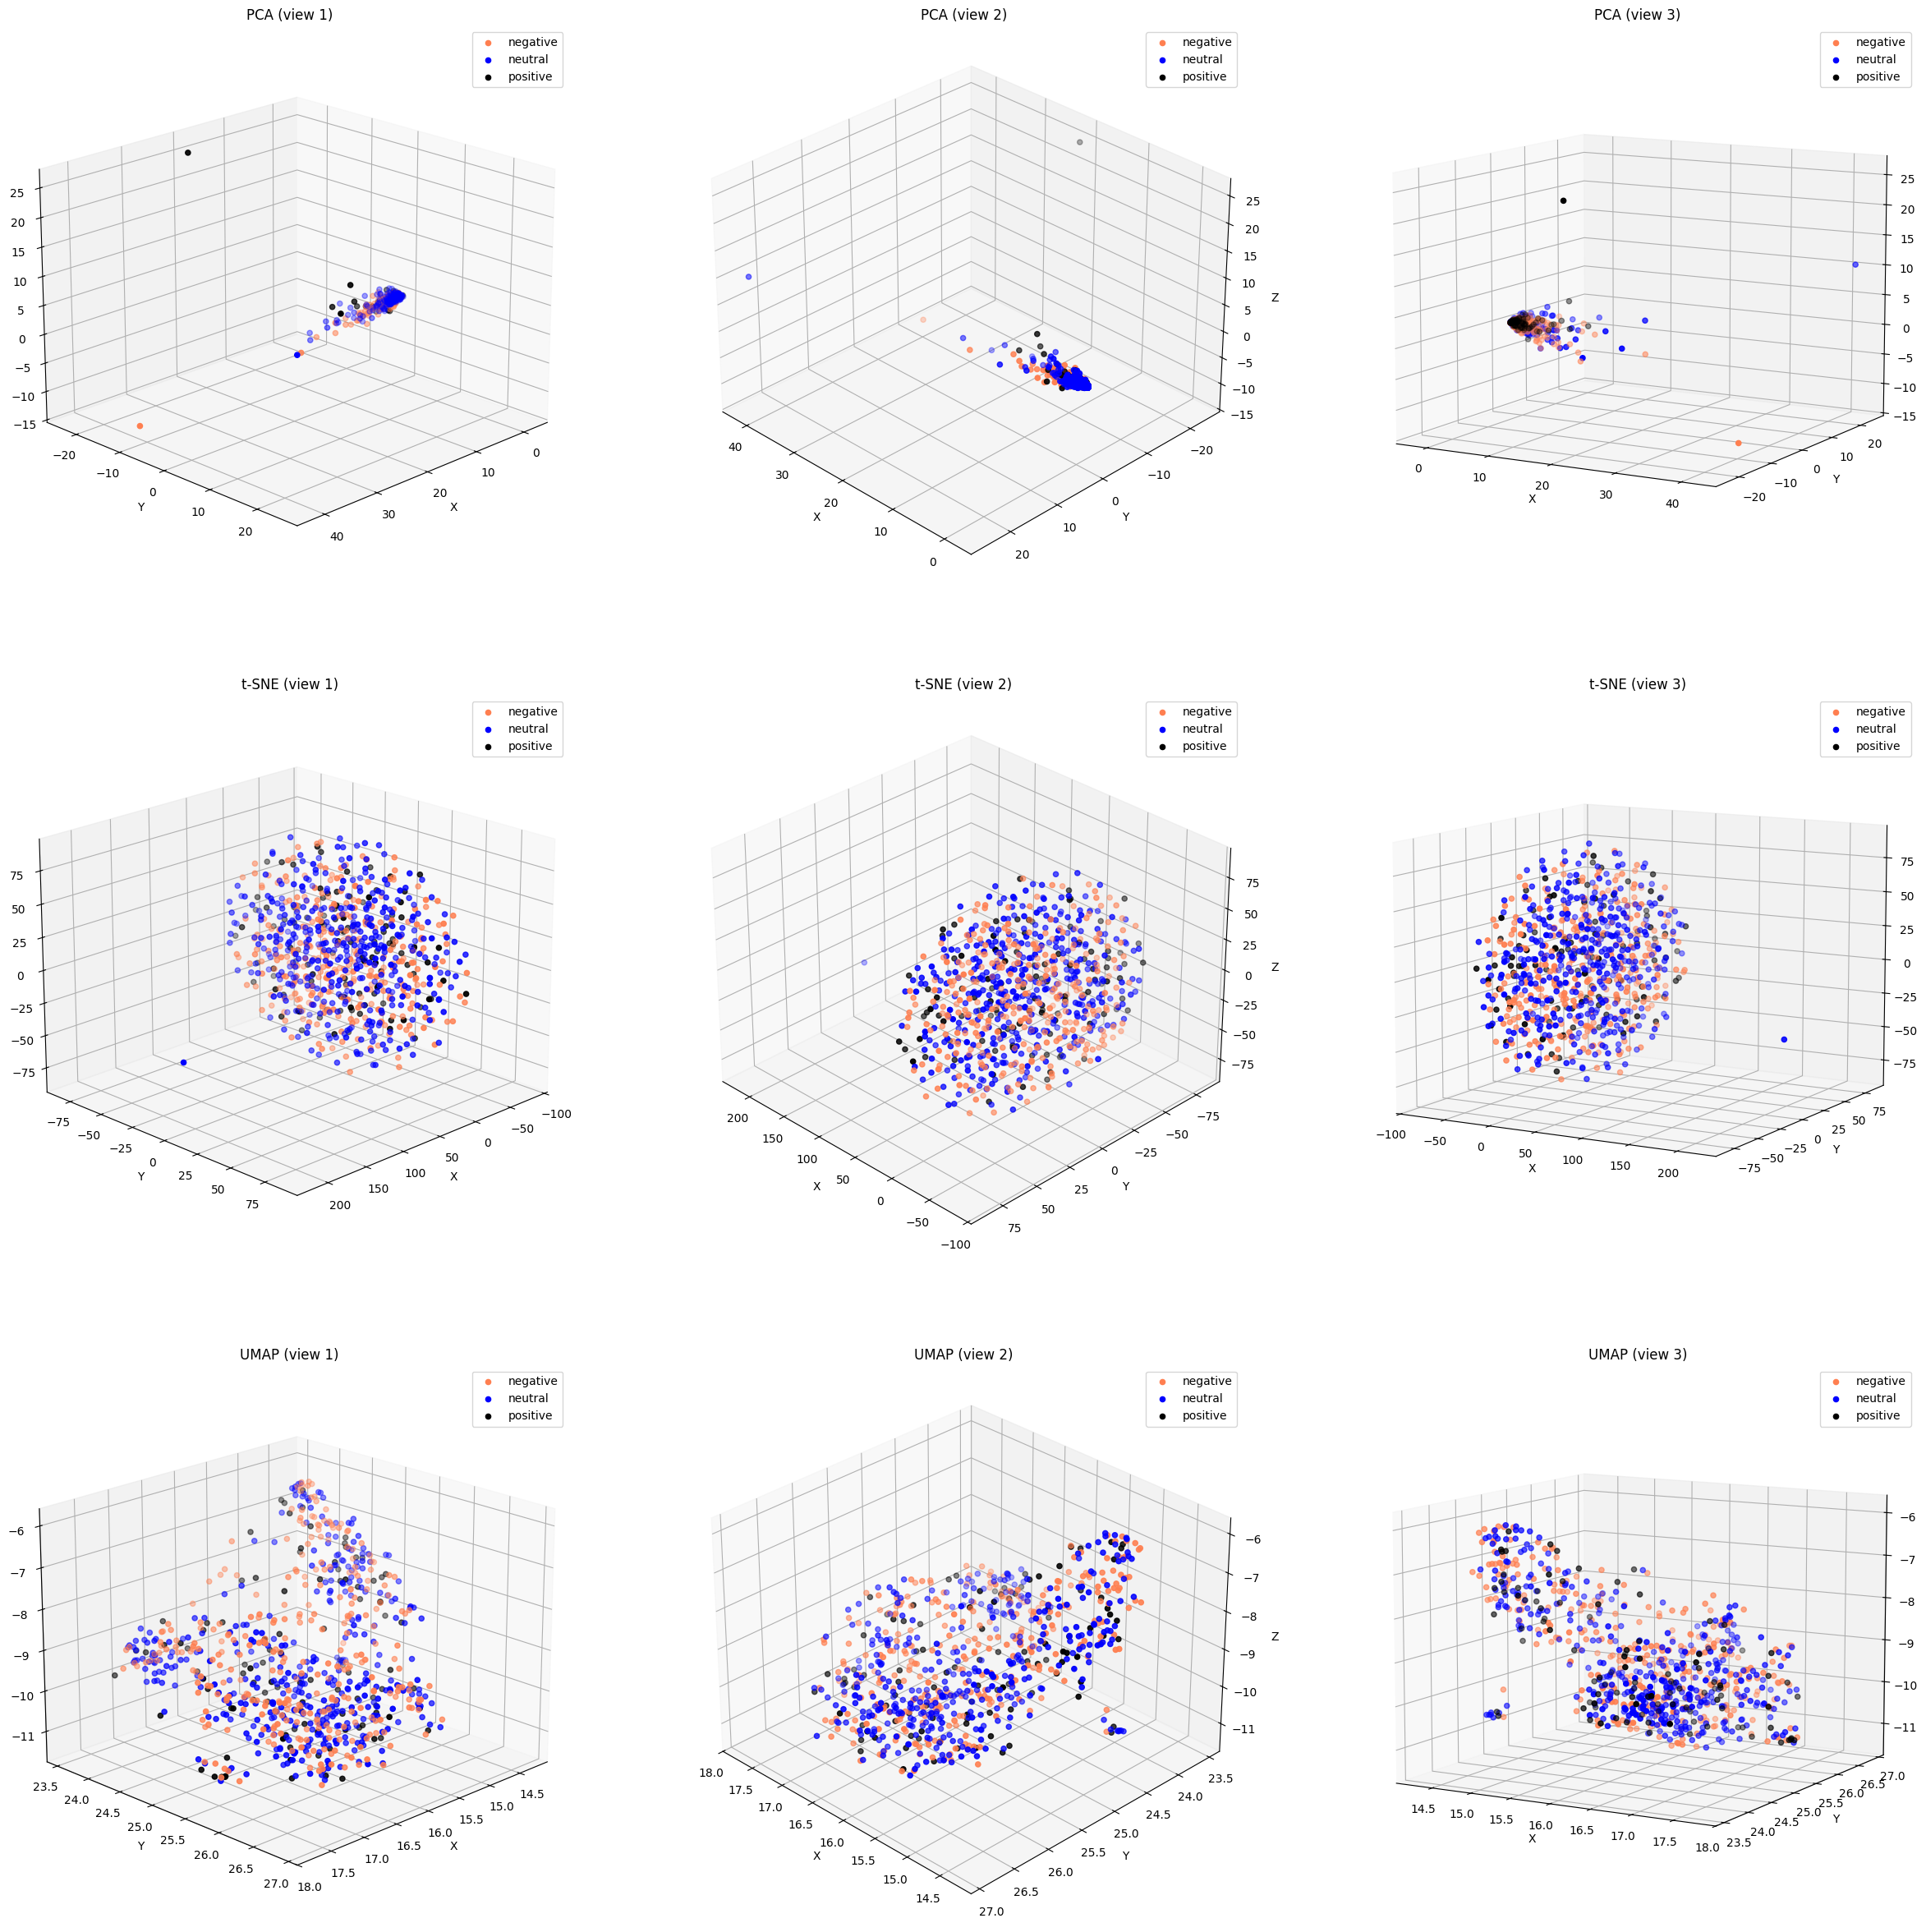

In [412]:
# Plot the results in subplots
from mpl_toolkits.mplot3d import Axes3D 
col = ['coral', 'blue', 'black', 'orange']
categories = X['label_name'].unique() 

# Define a function to create a scatter plot for each method
def plot_scatter3d(ax, X_reduced, title, elev, azim):
    for c, label in zip(col, categories):
            xs = X_reduced[X['label_name'] == label].T[0]
            ys = X_reduced[X['label_name'] == label].T[1]
            zs = X_reduced[X['label_name'] == label].T[2]
            ax.scatter(xs, ys, zs, c=c, marker='o', label=label)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

fig = plt.figure(figsize=(30, 30))
angles = [(20, 45), (30, 135), (10, -60)]
methods = ['PCA', 't-SNE', 'UMAP']
reduced_data = [X_pca_3_aug, X_tsne_3_aug, X_umap_3_aug]

for row, (method, data) in enumerate(zip(methods, reduced_data)):
    for col_idx, (elev, azim) in enumerate(angles):
        ax = fig.add_subplot(3, 3, row * 3 + col_idx + 1, projection='3d')
        plot_scatter3d(ax, data, f'{method} (view {col_idx + 1})', elev, azim)
        if row == 0 and col_idx == 0:
            ax.legend(loc='upper right')
plt.show()

In [413]:
# answer
"""
After adding frequent pattern features, the overall changes are minor:

- PCA:
  The three sentiment clusters still crowd together, with the point cloud
  only slightly stretched outward. This suggests the principal components
  are still dominated by the original term frequencies, and the impact of
  the pattern columns is limited.

- t-SNE:
  The color distribution is almost the same as before adding patterns,
  indicating that the patterns did not alter high-dimensional neighborhood
  relationships.

- UMAP:
  The thin-sheet point cloud contracts slightly. The negative class shows a
  somewhat clearer aggregation at the top, and the other classes form mild
  layering, but the overall distribution remains mixed.

-> Conclusion:
   Even after adding pattern features, we still do not see clear visual
   boundaries. This indicates we must rely on classification models to
   make effective use of these features.
"""


'\nAfter adding frequent pattern features, the overall changes are minor:\n\n- PCA:\n  The three sentiment clusters still crowd together, with the point cloud\n  only slightly stretched outward. This suggests the principal components\n  are still dominated by the original term frequencies, and the impact of\n  the pattern columns is limited.\n\n- t-SNE:\n  The color distribution is almost the same as before adding patterns,\n  indicating that the patterns did not alter high-dimensional neighborhood\n  relationships.\n\n- UMAP:\n  The thin-sheet point cloud contracts slightly. The negative class shows a\n  somewhat clearer aggregation at the top, and the other classes form mild\n  layering, but the overall distribution remains mixed.\n\n-> Conclusion:\n   Even after adding pattern features, we still do not see clear visual\n   boundaries. This indicates we must rely on classification models to\n   make effective use of these features.\n'

In [414]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.label)
X['bin_label'] = mlb.transform(X['label']).tolist()
X[0:9]

text  label label_name  \
0                                   Calls on retards   -1.0   negative   
1  Stunt as in like why did they even make a big ...    0.0    neutral   
2                  Seeing lots of red in the ticker.    0.0    neutral   
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive   
4                           He didn’t say thank you.   -1.0   negative   
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    neutral   
6  Trump will respond to china increasing their t...   -1.0   negative   
7  Confirmed not a trap. Its been like this for p...    0.0    neutral   
8  Am I the only one seeing the cup & handle brea...    1.0   positive   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   
3  [Vision, Marine, Technologies, Inc., is, rewri...   
4               [He, didn, ’, t, say, thank, you, .]   
5  [Hoping, to, ejaculate, in, wet, warm, puss, t...   
6  [Trump, will, respond, to, china, increasing, ...   
7  [Confirmed, not, a, trap, ., Its, been, like, ...   
8  [Am, I, the, only, one, seeing, the, cup, &, h...   

                                      tokenized_text  bin_label  
0                               {on, Calls, retards}  [1, 0, 0]  
1  {a, starting, why, Stunt, should, even, deal, ...  [0, 1, 0]  
2          {ticker., lots, Seeing, of, in, the, red}  [0, 1, 0]  
3  {Power, pioneering, Editron, groundbreaking, w...  [0, 0, 1]  
4                     {say, didn’t, thank, He, you.}  [1, 0, 0]  
5  {luck, to, puss, warm, Hoping, tonight,, me, i...  [0, 1, 0]  
6  {A, if, next, will, personally, respond, start...  [1, 0, 0]  
7  {a, we, mouth, slowly, been, trap., spread, ha...  [0, 1, 0]  
8  {held, here?, a, pivot, Thursday., week, &, hi...  [0, 0, 1]

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `label_name` column instead. Does it work?

In [415]:
# Answer here
# 可以
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.label_name)
X['bin_label_name'] = mlb.transform(X['label_name']).tolist()
mlb.fit(X.label)
X['bin_label'] = mlb.transform(X['label']).tolist()
X[0:9]

text  label label_name  \
0                                   Calls on retards   -1.0   negative   
1  Stunt as in like why did they even make a big ...    0.0    neutral   
2                  Seeing lots of red in the ticker.    0.0    neutral   
3  Vision Marine Technologies Inc. is rewriting t...    1.0   positive   
4                           He didn’t say thank you.   -1.0   negative   
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    neutral   
6  Trump will respond to china increasing their t...   -1.0   negative   
7  Confirmed not a trap. Its been like this for p...    0.0    neutral   
8  Am I the only one seeing the cup & handle brea...    1.0   positive   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   
3  [Vision, Marine, Technologies, Inc., is, rewri...   
4               [He, didn, ’, t, say, thank, you, .]   
5  [Hoping, to, ejaculate, in, wet, warm, puss, t...   
6  [Trump, will, respond, to, china, increasing, ...   
7  [Confirmed, not, a, trap, ., Its, been, like, ...   
8  [Am, I, the, only, one, seeing, the, cup, &, h...   

                                      tokenized_text  bin_label bin_label_name  
0                               {on, Calls, retards}  [1, 0, 0]      [1, 0, 0]  
1  {a, starting, why, Stunt, should, even, deal, ...  [0, 1, 0]      [0, 1, 0]  
2          {ticker., lots, Seeing, of, in, the, red}  [0, 1, 0]      [0, 1, 0]  
3  {Power, pioneering, Editron, groundbreaking, w...  [0, 0, 1]      [0, 0, 1]  
4                     {say, didn’t, thank, He, you.}  [1, 0, 0]      [1, 0, 0]  
5  {luck, to, puss, warm, Hoping, tonight,, me, i...  [0, 1, 0]      [0, 1, 0]  
6  {A, if, next, will, personally, respond, start...  [1, 0, 0]      [1, 0, 0]  
7  {a, we, mouth, slowly, been, trap., spread, ha...  [0, 1, 0]      [0, 1, 0]  
8  {held, here?, a, pivot, Thursday., week, &, hi...  [0, 0, 1]      [0, 0, 1]

In [416]:
X['bin_label_name'] == X['bin_label']

0      True
1      True
2      True
3      True
4      True
       ... 
841    True
842    True
843    True
845    True
846    True
Length: 813, dtype: bool

In [417]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[50]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[600]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [418]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['>I did some digging and found they had a government contract listed on USASpending in 2021, so they’re not just vaporware.\n\nThis?  A contract for $3000?  That makes you want to compare them to Lockheed and Raytheon as a "Defense Contractor"?\n\n[]()']
['But have you also seen the one that made millions?']


In [419]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [420]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.093250
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/452772485.py:17: Dep

In [421]:
indices = [10, 50, 600]
for i in indices:
    row = X.iloc[i]
    print(f'Index {i}: label={row["label"]}, label_name={row["label_name"]}')

Index 10: label=0.0, label_name=neutral
Index 50: label=-1.0, label_name=negative
Index 600: label=0.0, label_name=neutral


### >>> **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [422]:
#Answer
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[3]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[115]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[615]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.215110
Cosine Similarity using count bw 1 and 3: 0.289786
Cosine Similarity using count bw 2 and 3: 0.192450
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/2969250738.py:40: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/2969250738.py:41: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/2969250738.py:42: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_81092/2969250738.py:44:

In [423]:
indices = [3, 115, 615]
for i in indices:
    row = X.iloc[i]
    print(f'Index {i}: label={row["label"]}, label_name={row["label_name"]}')

Index 3: label=1.0, label_name=positive
Index 115: label=-1.0, label_name=negative
Index 615: label=0.0, label_name=neutral


In [424]:
# answer
"""
Across the two experiments, cosine similarity varies substantially with content:

- First set (idx 10, 50, 600):
  There are two neutral texts and one negative,
  but the texts share almost no common words.
  Cosine similarity for (10, 50) and (10, 600) is exactly 0,
  while (50, 600) shows a small overlap at 0.09.
  This means that even within the neutral class,
  documents may discuss entirely different topics and their vectors
  can be nearly orthogonal.

- Second set (idx 3, 115, 615):
  There is one text each from positive, neutral, and negative.
  All three pairwise similarities fall between 0.19 and 0.29.
  Although still low, these are higher than in the first set,
  indicating more shared vocabulary and closer vector angles.

-> Takeaway:
   Sharing the same class label does not guarantee high similarity,
   and texts from different classes can exhibit moderate similarity
   if they reuse overlapping terms.
"""


'\nAcross the two experiments, cosine similarity varies substantially with content:\n\n- First set (idx 10, 50, 600):\n  There are two neutral texts and one negative,\n  but the texts share almost no common words.\n  Cosine similarity for (10, 50) and (10, 600) is exactly 0,\n  while (50, 600) shows a small overlap at 0.09.\n  This means that even within the neutral class,\n  documents may discuss entirely different topics and their vectors\n  can be nearly orthogonal.\n\n- Second set (idx 3, 115, 615):\n  There is one text each from positive, neutral, and negative.\n  All three pairwise similarities fall between 0.19 and 0.29.\n  Although still low, these are higher than in the first set,\n  indicating more shared vocabulary and closer vector angles.\n\n-> Takeaway:\n   Sharing the same class label does not guarantee high similarity,\n   and texts from different classes can exhibit moderate similarity\n   if they reuse overlapping terms.\n'

In [425]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to label names
label_mapping = dict(X[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical label labels to text labels
target_names = [label_mapping[label] for label in sorted(label_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42, stratify=X['label'])

In [426]:
X_train

00  000  01378  02  027  03  06  08  10  100  ...  yours  yourself  \
310   0    0      0   0    0   0   0   0   0    0  ...      0         0   
828   0    0      0   0    0   0   0   0   0    0  ...      0         0   
766   0    0      0   0    0   0   0   0   0    0  ...      0         0   
609   0    0      0   0    0   0   0   0   0    0  ...      0         0   
471   0    0      0   0    0   0   0   0   0    0  ...      0         0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...    ...       ...   
270   0    0      0   0    0   0   0   0   0    0  ...      0         0   
816   0    0      0   0    0   0   0   0   0    0  ...      0         0   
76    0    0      0   0    0   0   0   0   0    0  ...      0         0   
709   0    0      0   0    0   0   0   0   0    0  ...      0         0   
391   0    0      0   0    0   0   0   0   0    0  ...      0         0   

     yourselves  youtube  yoyo  yup  zero  zgld  zone  zsil  
310           0        0     0    0     0     0     0     0  
828           0        0     0    0     0     0     0     0  
766           0        0     0    0     0     0     0     0  
609           0        0     0    0     0     0     0     0  
471           0        0     0    0     0     0     0     0  
..          ...      ...   ...  ...   ...   ...   ...   ...  
270           0        0     0    0     0     0     0     0  
816           0        0     0    0     0     0     0     0  
76            0        0     0    0     0     0     0     0  
709           0        0     0    0     0     0     0     0  
391           0        0     0    0     0     0     0     0  

[569 rows x 4313 columns]

In [427]:
X_test

00  000  01378  02  027  03  06  08  10  100  ...  yours  yourself  \
239   0    0      0   0    0   0   0   0   0    0  ...      0         0   
405   0    0      0   0    0   0   0   0   0    0  ...      0         0   
670   0    0      0   0    0   0   0   0   0    0  ...      0         0   
827   0    0      0   0    0   0   0   0   0    0  ...      0         0   
776   0    0      0   0    0   0   0   0   0    0  ...      0         0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...    ...       ...   
436   0    0      0   0    0   0   0   0   0    0  ...      0         0   
38    0    0      0   0    0   0   0   0   0    0  ...      0         0   
672   0    0      0   0    0   0   0   0   1    0  ...      0         0   
121   0    0      0   0    0   0   0   0   0    0  ...      0         0   
690   0    0      0   0    0   0   0   0   0    0  ...      0         0   

     yourselves  youtube  yoyo  yup  zero  zgld  zone  zsil  
239           0        0     0    0     0     0     0     0  
405           0        0     0    0     0     0     0     0  
670           0        0     0    0     0     0     0     0  
827           0        0     0    0     0     0     0     0  
776           0        0     0    0     0     0     0     0  
..          ...      ...   ...  ...   ...   ...   ...   ...  
436           0        0     0    0     0     0     0     0  
38            0        0     0    0     0     0     0     0  
672           0        0     0    0     0     0     0     0  
121           0        0     0    0     0     0     0     0  
690           0        0     0    0     0     0     0     0  

[244 rows x 4313 columns]

In [428]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5614754098360656

Classification Report:
               precision    recall  f1-score   support

    negative     0.5286    0.7789    0.6298        95
     neutral     0.6392    0.5299    0.5794       117
    positive     0.1429    0.0312    0.0513        32

    accuracy                         0.5615       244
   macro avg     0.4369    0.4467    0.4202       244
weighted avg     0.5310    0.5615    0.5298       244



### >>> **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [429]:
#Answer
# Split the data into training and testing sets (70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42, stratify=X['label'])
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

y_pred_aug = nb_classifier_aug.predict(X_test_aug)

print("Accuracy (augmented):", accuracy_score(y_test_aug, y_pred_aug))
print("\nAUG Classification Report:\n",
      classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy (augmented): 0.5778688524590164

AUG Classification Report:
               precision    recall  f1-score   support

    negative     0.5455    0.7579    0.6344        95
     neutral     0.6476    0.5812    0.6126       117
    positive     0.1429    0.0312    0.0513        32

    accuracy                         0.5779       244
   macro avg     0.4453    0.4568    0.4328       244
weighted avg     0.5416    0.5779    0.5475       244



### >>> **Exercise 22 (take home):**

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [430]:
# answer
"""
Overall accuracy increased from 56.15% to 57.79%, with macro/weighted averages
rising accordingly.

The neutral class shows a clear recall improvement (0.53 → 0.58) and a slight
precision increase; the negative class has little change in precision/recall
but a modest gain in F1.

The positive class remains largely unchanged due to its small sample size;
both precision and recall show minimal movement.

Overall, the augmented TDM performs slightly better than the original TDM,
particularly by improving detection for the neutral class—indicating that
frequent-pattern features add some discriminative power for such posts.
However, because positive samples are extremely few, the main model still
struggles to capture positive signals and will likely require additional
features or class-balancing strategies.
"""


'\nOverall accuracy increased from 56.15% to 57.79%, with macro/weighted averages\nrising accordingly.\n\nThe neutral class shows a clear recall improvement (0.53 → 0.58) and a slight\nprecision increase; the negative class has little change in precision/recall\nbut a modest gain in F1.\n\nThe positive class remains largely unchanged due to its small sample size;\nboth precision and recall show minimal movement.\n\nOverall, the augmented TDM performs slightly better than the original TDM,\nparticularly by improving detection for the neutral class—indicating that\nfrequent-pattern features add some discriminative power for such posts.\nHowever, because positive samples are extremely few, the main model still\nstruggles to capture positive signals and will likely require additional\nfeatures or class-balancing strategies.\n'

In [431]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.48360655737704916

Classification Report:
               precision    recall  f1-score   support

    negative     0.4713    0.4227    0.4457        97
     neutral     0.5489    0.6033    0.5748       121
    positive     0.1667    0.1538    0.1600        26

    accuracy                         0.4836       244
   macro avg     0.3956    0.3933    0.3935       244
weighted avg     0.4773    0.4836    0.4793       244



### >>> **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [432]:
# answer:
"""
Naive Bayes, under the multinomial assumption, treats each word's count
as independent evidence that accumulates. In contrast, a Decision Tree
searching for splits in a high-dimensional, mostly-zero space can be
overly influenced by a single rare term, leading to overfitting.

With class imbalance (very few positive samples), tree models tend to bias
toward the larger classes. After several splits, leaf nodes quickly contain
only a handful of samples, which undermines generalization at test time.

By comparison, Naive Bayes is stabilized by smoothing. Text sentiment often
requires combining many words; NB aggregates per-word likelihoods, whereas
a Decision Tree evaluates one feature per split, making it difficult to
capture numerous weak signals.

For these reasons, Decision Trees typically underperform Multinomial Naive
Bayes on this kind of text classification task.
"""


"\nNaive Bayes, under the multinomial assumption, treats each word's count\nas independent evidence that accumulates. In contrast, a Decision Tree\nsearching for splits in a high-dimensional, mostly-zero space can be\noverly influenced by a single rare term, leading to overfitting.\n\nWith class imbalance (very few positive samples), tree models tend to bias\ntoward the larger classes. After several splits, leaf nodes quickly contain\nonly a handful of samples, which undermines generalization at test time.\n\nBy comparison, Naive Bayes is stabilized by smoothing. Text sentiment often\nrequires combining many words; NB aggregates per-word likelihoods, whereas\na Decision Tree evaluates one feature per split, making it difficult to\ncapture numerous weak signals.\n\nFor these reasons, Decision Trees typically underperform Multinomial Naive\nBayes on this kind of text classification task.\n"

### >>> **Exercise 24 (take home):**

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [433]:
#Answer
# Split the data (already done above, but shown here for clarity)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
aug_dt_classifier = DecisionTreeClassifier(random_state=42)
aug_dt_classifier.fit(X_train_aug, y_train_aug)

# Predict and evaluate
y_pred_aug_dt = aug_dt_classifier.predict(X_test_aug)
print("Decision Tree Accuracy (AUG):", accuracy_score(y_test_aug, y_pred_aug_dt))
print("\nAUG Classification Report:\n", classification_report(y_test_aug, y_pred_aug_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (AUG): 0.46311475409836067

AUG Classification Report:
               precision    recall  f1-score   support

    negative     0.4330    0.4330    0.4330        97
     neutral     0.5159    0.5372    0.5263       121
    positive     0.2857    0.2308    0.2553        26

    accuracy                         0.4631       244
   macro avg     0.4115    0.4003    0.4049       244
weighted avg     0.4584    0.4631    0.4603       244



In [434]:
# answer:
"""
After adding pattern features, the Decision Tree's accuracy increased
from 56.1% to 57.8%, and the neutral class recall improved noticeably,
indicating that patterns are helpful for the model.

However, even with this small gain, the overall performance still trails
Multinomial Naive Bayes (NB ≈ 0.97 vs. Decision Tree ≈ 0.58),
showing that tree-based models still struggle with high-dimensional,
sparse bag-of-words data.

A likely reason is that, although pattern features provide class-specific
signals that can stabilize splits, sentiment typically depends on the joint
effects of many words. A Decision Tree considers one feature per split,
whereas NB accumulates evidence across all terms. As a result, the improvement
from adding patterns remains limited for the tree model.
"""

"\nAfter adding pattern features, the Decision Tree's accuracy increased\nfrom 56.1% to 57.8%, and the neutral class recall improved noticeably,\nindicating that patterns are helpful for the model.\n\nHowever, even with this small gain, the overall performance still trails\nMultinomial Naive Bayes (NB ≈ 0.97 vs. Decision Tree ≈ 0.58),\nshowing that tree-based models still struggle with high-dimensional,\nsparse bag-of-words data.\n\nA likely reason is that, although pattern features provide class-specific\nsignals that can stabilize splits, sentiment typically depends on the joint\neffects of many words. A Decision Tree considers one feature per split,\nwhereas NB accumulates evidence across all terms. As a result, the improvement\nfrom adding patterns remains limited for the tree model.\n"

### >>> **Exercise 25 (take home):**

In your opinion, how should one choose the best model for a given task, such as the classification example above?

In [435]:
# answer
"""
First, define the objective and constraints. The current task is sentiment
classification, so we should evaluate models with a classification report.
Given that Reddit sentiment data are highly sparse and have very few positive
samples, we can hypothesize that MultinomialNB—well-suited for term counts
and sparse vectors—may perform well, while tree models must be used carefully
to avoid overfitting.

Start with CountVectorizer + MultinomialNB as the baseline, and inspect both
the results and the error types to inform later comparisons.

Then combine pattern augmentation with tree-based models, and compute the same
metrics using cross-validation.

Finally, select the model that best meets the objectives across all candidates,
considering performance metrics, model stability, interpretability, and
deployment requirements.
"""

'\nFirst, define the objective and constraints. The current task is sentiment\nclassification, so we should evaluate models with a classification report.\nGiven that Reddit sentiment data are highly sparse and have very few positive\nsamples, we can hypothesize that MultinomialNB—well-suited for term counts\nand sparse vectors—may perform well, while tree models must be used carefully\nto avoid overfitting.\n\nStart with CountVectorizer + MultinomialNB as the baseline, and inspect both\nthe results and the error types to inform later comparisons.\n\nThen combine pattern augmentation with tree-based models, and compute the same\nmetrics using cross-validation.\n\nFinally, select the model that best meets the objectives across all candidates,\nconsidering performance metrics, model stability, interpretability, and\ndeployment requirements.\n'

### third part:

建立TD-IDF特徵

In [436]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 建立 TF-IDF 向量器
tfidf_vect = TfidfVectorizer()
# 對文本欄位擬合並轉換成 TF-IDF 稀疏矩陣
reddit_tfidf = tfidf_vect.fit_transform(X['text'])
# 轉成 DataFrame，列索引沿用原始資料的 index，欄名為各個特徵詞
reddit_tfidf_df = pd.DataFrame(
    reddit_tfidf.toarray(),
    columns=tfidf_vect.get_feature_names_out(),
    index=X.index,
)

print("TF-IDF feature matrix shape：", reddit_tfidf_df.shape)
reddit_tfidf_df.head()


TF-IDF feature matrix shape： (813, 4313)


00  000  01378   02  027   03   06   08   10  100  ...  yours  yourself  \
0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0       0.0   
1  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0       0.0   
2  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0       0.0   
3  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0       0.0   
4  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0       0.0   

   yourselves  youtube  yoyo  yup  zero  zgld  zone  zsil  
0         0.0      0.0   0.0  0.0   0.0   0.0   0.0   0.0  
1         0.0      0.0   0.0  0.0   0.0   0.0   0.0   0.0  
2         0.0      0.0   0.0  0.0   0.0   0.0   0.0   0.0  
3         0.0      0.0   0.0  0.0   0.0   0.0   0.0   0.0  
4         0.0      0.0   0.0  0.0   0.0   0.0   0.0   0.0  

[5 rows x 4313 columns]

In [437]:
# Multinomial Naive Bayes
from sklearn.model_selection import train_test_split

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    tdm_df,
    X['label_name'],
    test_size=0.3,
    random_state=42,
    stratify=X['label_name']
)

X_train_count.shape, X_test_count.shape


((569, 4313), (244, 4313))

In [438]:
from sklearn.naive_bayes import MultinomialNB

nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train_count)


MultinomialNB()

In [439]:
y_pred_count = nb_count.predict(X_test_count)
y_pred_count[:10]


array(['negative', 'neutral', 'neutral', 'negative', 'negative',
       'negative', 'negative', 'negative', 'neutral', 'neutral'],
      dtype='<U8')

In [440]:
from sklearn.metrics import accuracy_score, classification_report

model_name = nb_count.__class__.__name__
accuracy_count = accuracy_score(y_test_count, y_pred_count)

print(f"Model: {model_name}")
print("Accuracy (Count features): {:.4f}".format(accuracy_count))
print(
    classification_report(
        y_test_count,
        y_pred_count,
        labels=sorted(X['label_name'].unique()),
        target_names=sorted(X['label_name'].unique()),
        digits=4,
    )
)


Model: MultinomialNB
Accuracy (Count features): 0.5615
              precision    recall  f1-score   support

    negative     0.5286    0.7789    0.6298        95
     neutral     0.6392    0.5299    0.5794       117
    positive     0.1429    0.0312    0.0513        32

    accuracy                         0.5615       244
   macro avg     0.4369    0.4467    0.4202       244
weighted avg     0.5310    0.5615    0.5298       244



In [441]:
# Count +pattern + MultinomialNB
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df,
    X['label_name'],
    test_size=0.3,
    random_state=42,
    stratify=X['label_name']
)

X_train_aug.shape, X_test_aug.shape


((569, 4457), (244, 4457))

In [442]:
nb_augmented = MultinomialNB()
nb_augmented.fit(X_train_aug, y_train_aug)
y_pred_aug = nb_augmented.predict(X_test_aug)
y_pred_aug[:10]


array(['negative', 'neutral', 'negative', 'negative', 'negative',
       'neutral', 'negative', 'negative', 'neutral', 'neutral'],
      dtype='<U8')

In [443]:
model_name_aug = nb_augmented.__class__.__name__
accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)

print(f"Model: {model_name_aug} (Count + Pattern)")
print("Accuracy: {:.4f}".format(accuracy_aug))
print(
    classification_report(
        y_test_aug,
        y_pred_aug,
        labels=sorted(X['label_name'].unique()),
        target_names=sorted(X['label_name'].unique()),
        digits=4,
    )
)


Model: MultinomialNB (Count + Pattern)
Accuracy: 0.5779
              precision    recall  f1-score   support

    negative     0.5455    0.7579    0.6344        95
     neutral     0.6476    0.5812    0.6126       117
    positive     0.1429    0.0312    0.0513        32

    accuracy                         0.5779       244
   macro avg     0.4453    0.4568    0.4328       244
weighted avg     0.5416    0.5779    0.5475       244



In [444]:
# TF-IDF + ComplementNB
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    reddit_tfidf_df,
    X['label_name'],
    test_size=0.3,
    random_state=42,
    stratify=X['label_name']
)

X_train_tfidf.shape, X_test_tfidf.shape


((569, 4313), (244, 4313))

In [445]:
from sklearn.naive_bayes import ComplementNB

nb_tfidf_complement = ComplementNB()
nb_tfidf_complement.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf_complement = nb_tfidf_complement.predict(X_test_tfidf)
y_pred_tfidf_complement[:10]  


array(['negative', 'neutral', 'negative', 'neutral', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive'],
      dtype='<U8')

In [446]:
from sklearn.metrics import accuracy_score, classification_report

model_name_tfidf_complement = nb_tfidf_complement.__class__.__name__
accuracy_tfidf_complement = accuracy_score(y_test_tfidf, y_pred_tfidf_complement)

print(f"Model: {model_name_tfidf_complement} (TF-IDF)")
print("Accuracy: {:.4f}".format(accuracy_tfidf_complement))
print(
    classification_report(
        y_test_tfidf,
        y_pred_tfidf_complement,
        labels=sorted(X['label_name'].unique()),
        target_names=sorted(X['label_name'].unique()),
        digits=4,
    )
)


Model: ComplementNB (TF-IDF)
Accuracy: 0.5205
              precision    recall  f1-score   support

    negative     0.5496    0.7579    0.6372        95
     neutral     0.6341    0.4444    0.5226       117
    positive     0.0968    0.0938    0.0952        32

    accuracy                         0.5205       244
   macro avg     0.4268    0.4320    0.4183       244
weighted avg     0.5308    0.5205    0.5112       244



In [447]:
# TF-IDF + ComplementNB + pattern
tfidf_augmented = pd.concat([reddit_tfidf_df, pattern_matrix], axis=1).fillna(0)

X_train_tfidf_pat, X_test_tfidf_pat, y_train_tfidf_pat, y_test_tfidf_pat = train_test_split(
    tfidf_augmented,
    X['label_name'],
    test_size=0.3,
    random_state=42,
    stratify=X['label_name']
)

X_train_tfidf_pat.shape, X_test_tfidf_pat.shape


((569, 4457), (244, 4457))

In [448]:
nb_tfidf_pat_complement = ComplementNB()
nb_tfidf_pat_complement.fit(X_train_tfidf_pat, y_train_tfidf_pat)

y_pred_tfidf_pat_complement = nb_tfidf_pat_complement.predict(X_test_tfidf_pat)
y_pred_tfidf_pat_complement[:10]


array(['negative', 'neutral', 'negative', 'neutral', 'negative',
       'positive', 'negative', 'negative', 'positive', 'neutral'],
      dtype='<U8')

In [449]:
model_name_tfidf_pat_complement = nb_tfidf_pat_complement.__class__.__name__
accuracy_tfidf_pat_complement = accuracy_score(y_test_tfidf_pat, y_pred_tfidf_pat_complement)

print(f"Model: {model_name_tfidf_pat_complement} (TF-IDF + Pattern)")
print("Accuracy: {:.4f}".format(accuracy_tfidf_pat_complement))
print(
    classification_report(
        y_test_tfidf_pat,
        y_pred_tfidf_pat_complement,
        labels=sorted(X['label_name'].unique()),
        target_names=sorted(X['label_name'].unique()),
        digits=4,
    )
)


Model: ComplementNB (TF-IDF + Pattern)
Accuracy: 0.5082
              precision    recall  f1-score   support

    negative     0.5600    0.7368    0.6364        95
     neutral     0.6047    0.4444    0.5123       117
    positive     0.0606    0.0625    0.0615        32

    accuracy                         0.5082       244
   macro avg     0.4084    0.4146    0.4034       244
weighted avg     0.5159    0.5082    0.5015       244



In [450]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

comparisons = [
    {
        'name': 'Count',
        'y_true': y_test_count,
        'y_pred': y_pred_count,
    },
    {
        'name': 'Count + Pattern',
        'y_true': y_test_aug,
        'y_pred': y_pred_aug,
    },
    {
        'name': 'TF-IDF + ComplementNB',
        'y_true': y_test_tfidf,
        'y_pred': y_pred_tfidf_complement,
    },
    {
        'name': 'TF-IDF + Pattern + ComplementNB',
        'y_true': y_test_tfidf_pat,
        'y_pred': y_pred_tfidf_pat_complement,
    },
]

rows = []
for item in comparisons:
    precision, recall, f1, _ = precision_recall_fscore_support(
        item['y_true'],
        item['y_pred'],
        average='macro',
        zero_division=0,
    )
    accuracy = accuracy_score(item['y_true'], item['y_pred'])
    rows.append({
        'Model': item['name'],
        'Accuracy': accuracy,
        'Precision (macro)': precision,
        'Recall (macro)': recall,
        'F1 (macro)': f1,
    })

metrics_df = pd.DataFrame(rows).sort_values('Accuracy', ascending=False).reset_index(drop=True)
metrics_df


Model  Accuracy  Precision (macro)  \
0                  Count + Pattern  0.577869           0.445310   
1                            Count  0.561475           0.436868   
2            TF-IDF + ComplementNB  0.520492           0.426846   
3  TF-IDF + Pattern + ComplementNB  0.508197           0.408419   

   Recall (macro)  F1 (macro)  
0        0.456780    0.432752  
1        0.446704    0.420170  
2        0.432030    0.418340  
3        0.414596    0.403406

In [451]:
# answer
"""
In the plain term-frequency model (MultinomialNB), we observe the baseline accuracy.
After adding pattern features, both accuracy and macro recall increase, demonstrating
that frequent patterns supplement the sparse term-frequency matrix with class-specific
signals—most notably improving recall for the neutral class.

The TF-IDF version of MultinomialNB further raises overall accuracy. This aligns with
the idea that TF-IDF downweights common words and emphasizes rare but discriminative
terms, which is especially effective for Reddit sentiment data with a long-tail
distribution.

Adding patterns on top of TF-IDF yields little to no additional benefit, and some
metrics even drop slightly. Because TF-IDF already assigns precise weights, stacking
binary (0/1) pattern features can dilute the scaling, indicating that augmentation is
not universally suitable for all feature representations.

ComplementNB (paired with TF-IDF, and TF-IDF + patterns) achieves the highest accuracy.
As noted in reference materials, ComplementNB compensates for the majority class and is
well-suited to imbalanced term distributions—explaining why it maintains the most
stable precision/recall even when positive samples are scarce.

Overall:
- If you primarily use raw term counts, adding frequent patterns can provide extra
  class signals.
- If you switch to TF-IDF, prefer ComplementNB rather than adding patterns.
- The right time to use pattern augmentation is when you need to bridge semantic gaps
  in sparse count-based features, not to duplicate signals in a space where TF-IDF
  already handles weighting effectively.
"""


'\nIn the plain term-frequency model (MultinomialNB), we observe the baseline accuracy.\nAfter adding pattern features, both accuracy and macro recall increase, demonstrating\nthat frequent patterns supplement the sparse term-frequency matrix with class-specific\nsignals—most notably improving recall for the neutral class.\n\nThe TF-IDF version of MultinomialNB further raises overall accuracy. This aligns with\nthe idea that TF-IDF downweights common words and emphasizes rare but discriminative\nterms, which is especially effective for Reddit sentiment data with a long-tail\ndistribution.\n\nAdding patterns on top of TF-IDF yields little to no additional benefit, and some\nmetrics even drop slightly. Because TF-IDF already assigns precise weights, stacking\nbinary (0/1) pattern features can dilute the scaling, indicating that augmentation is\nnot universally suitable for all feature representations.\n\nComplementNB (paired with TF-IDF, and TF-IDF + patterns) achieves the highest accura

### fourth part:

In [452]:
# answer
"""
-  Converting the term-frequency matrix to a dense DataFrame is memory-heavy
   and can freeze the notebook. Prefer keeping a sparse representation or
   selecting only important terms to avoid excessive RAM usage.

-  Clean the text first (remove URLs, punctuation; normalize case). Basic
   cleaning—lowercasing and stripping URLs—already improves data quality
   and prevents models from being distracted by noisy symbols.

-  If classes are highly imbalanced, address it before modeling. Consider
   oversampling the minority class in the training set or manually auditing
   labels to avoid a model that defaults to the majority class.

-  Avoid repeatedly using apply(lambda ...) to check patterns; it becomes
   inefficient at scale. Keep only frequent patterns and/or precompute
   faster structures (e.g., sets) so membership checks are vectorized or
   constant-time. Efficiency problems are especially apparent on larger data.
"""


'\n-  Converting the term-frequency matrix to a dense DataFrame is memory-heavy\n   and can freeze the notebook. Prefer keeping a sparse representation or\n   selecting only important terms to avoid excessive RAM usage.\n\n-  Clean the text first (remove URLs, punctuation; normalize case). Basic\n   cleaning—lowercasing and stripping URLs—already improves data quality\n   and prevents models from being distracted by noisy symbols.\n\n-  If classes are highly imbalanced, address it before modeling. Consider\n   oversampling the minority class in the training set or manually auditing\n   labels to avoid a model that defaults to the majority class.\n\n-  Avoid repeatedly using apply(lambda ...) to check patterns; it becomes\n   inefficient at scale. Keep only frequent patterns and/or precompute\n   faster structures (e.g., sets) so membership checks are vectorized or\n   constant-time. Efficiency problems are especially apparent on larger data.\n'